# Compare multi fitted atmospheric parameters with MERRA2

- author Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : June 1th 2023
- last update : June 01th 2023

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import os,sys,re

from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline
import pickle
import seaborn as sns
import copy
from collections import OrderedDict

In [2]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [3]:
import time
from datetime import datetime,date
from astropy.time import Time
import dateutil.parser
import pytz

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

# Config

## Data

In [5]:
DATE="2022 - 2023"

In [6]:
FLAG_SELECT_POLAR = True
FLAG_SELECT_REMOVE_BIGSIGMA = True

In [7]:
if FLAG_SELECT_POLAR:
    tag_stars = "HD185975_star"
else:
    tag_stars = "all_stars"

In [8]:
path_out = "dataout/fitparamatm"

In [9]:
filenames = [
"multifitcovparamatm-2022-09-28-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-09-29-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-12-08-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-12-09-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-01-17-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-01-18-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-02-28-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-03-01-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-03-16-empty~holo4_003-psf2dffm-polar.csv",
]

In [10]:
NDAYS = len(filenames)
tags = [
    "2022/09/28","2022/09/29",
    "2022/12/08","2022/12/09",
    "2023/01/17","2023/01/18",
    "2023/02/28",
    "2023/03/01","2023/03/16"
]

In [11]:
all_df = []
for filename in filenames:
    df = pd.read_csv(os.path.join(path_out,filename), index_col=0)
    df=df.dropna(axis=0)
    
    #cut on chi2
    df = df[df['chi2_1']<400]
    
    if FLAG_SELECT_POLAR:
        df = df[df["spec_target_label"]=='HD185975']
        
    if FLAG_SELECT_REMOVE_BIGSIGMA:
        df =df[df["pwv_sig"]<1]
    all_df.append(df)

In [12]:
df

,index,exposure,spec_date_obs,spec_target_label,spec_filter_label,spec_airmass,spec_pressure,spec_temperature,spec_humidity,spec_hour_angle,...,egrey_3,SNR_3,chi2_4,pwv_4,grey_4,epwv_4,egrey_4,SNR_4,pwv_avg,pwv_sig
0,0,2023031600465,2023-03-17T06:20:56.082001145Z,HD185975,empty,2.034006,0,0,0,-107.983587,...,0.003375,0.095779,21.663655,6.200210,0.999881,0.411213,0.002681,0.188675,5.522622,0.515529
1,1,2023031600466,2023-03-17T06:21:39.074005228Z,HD185975,empty,2.033523,0,0,0,-107.803713,...,0.001492,0.137924,4.329144,6.542212,1.014420,0.200011,0.001291,0.035338,6.112205,0.587073
2,8,2023031600505,2023-03-17T06:52:06.172502735Z,HD185975,empty,2.013025,0,0,0,-100.287611,...,0.002842,0.002668,13.835022,6.087717,1.012974,0.329024,0.002153,0.099725,5.438182,0.381420
3,9,2023031600506,2023-03-17T06:52:49.175495727Z,HD185975,empty,2.012533,0,0,0,-100.107582,...,0.002411,0.007191,9.441243,6.474159,1.011041,0.274134,0.001786,0.100454,5.480239,0.539032
4,16,2023031600544,2023-03-17T07:26:52.619493301Z,HD185975,empty,1.989428,0,0,0,-91.696580,...,0.003484,0.246430,71.731011,5.175477,1.010764,0.692025,0.004733,0.156492,4.347621,0.442855
5,17,2023031600545,2023-03-17T07:27:35.585004713Z,HD185975,empty,1.988936,0,0,0,-91.517218,...,0.002886,0.007144,12.997179,6.200799,1.013412,0.321800,0.002103,0.085680,5.107693,0.598387
6,26,2023031600589,2023-03-17T07:59:53.341001019Z,HD185975,empty,1.967435,0,0,0,-83.628469,...,0.002378,0.028453,9.417040,5.993255,1.015603,0.264495,0.001757,0.054646,5.285668,0.466320
7,27,2023031600590,2023-03-17T08:00:36.347990813Z,HD185975,empty,1.966954,0,0,0,-83.448648,...,0.002032,0.027109,6.675834,6.275041,1.022054,0.231483,0.001504,0.030447,5.588002,0.524087
8,37,2023031600645,2023-03-17T08:43:51.125005011Z,HD185975,empty,1.939320,0,0,0,-72.914176,...,0.002782,0.037469,11.175021,5.626754,1.014788,0.290339,0.001897,0.080015,4.629942,0.522589
9,38,2023031600646,2023-03-17T08:44:34.193006376Z,HD185975,empty,1.938865,0,0,0,-72.734137,...,0.002322,0.046317,8.692568,5.761020,1.016306,0.259363,0.001694,0.073321,4.927867,0.454643


In [13]:
NF =len(all_df)

In [14]:
all_df[0].head()

,index,exposure,spec_date_obs,spec_target_label,spec_filter_label,spec_airmass,spec_pressure,spec_temperature,spec_humidity,spec_hour_angle,...,egrey_3,SNR_3,chi2_4,pwv_4,grey_4,epwv_4,egrey_4,SNR_4,pwv_avg,pwv_sig
0,0,2022092800358,2022-09-29T02:07:48.026501837Z,HD185975,empty,1.844346,0,0,0,-339.105629,...,0.002039,0.064295,7.841671,7.454947,1.022783,0.267768,0.001601,0.008143,6.021424,0.985342
2,20,2022092800469,2022-09-29T03:24:22.341002192Z,HD185975,empty,1.865924,0,0,0,-319.739723,...,0.002473,0.077616,14.283400,7.019726,1.025409,0.346493,0.002080,0.041179,5.395456,0.902924
3,21,2022092800470,2022-09-29T03:25:05.327496966Z,HD185975,empty,1.866183,0,0,0,-319.556360,...,0.002365,0.025491,16.887534,6.707261,1.013475,0.367649,0.002237,0.024022,5.331986,0.820346
4,36,2022092800568,2022-09-29T04:38:23.799991948Z,HD185975,empty,1.899071,0,0,0,-300.869912,...,0.001495,0.113900,5.632417,7.248881,1.031584,0.227425,0.001392,0.007888,6.128547,0.844436
5,37,2022092800569,2022-09-29T04:39:06.609505316Z,HD185975,empty,1.899431,0,0,0,-300.691076,...,0.002390,0.059919,13.654646,7.122673,1.022839,0.343111,0.002075,0.000126,6.119875,0.539241


In [15]:
hls_colors = sns.color_palette("hls", NF)

## Airmass

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_74185/1147230304.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,airmasses,'r:o',color=hls_colors[idx],lw=3)


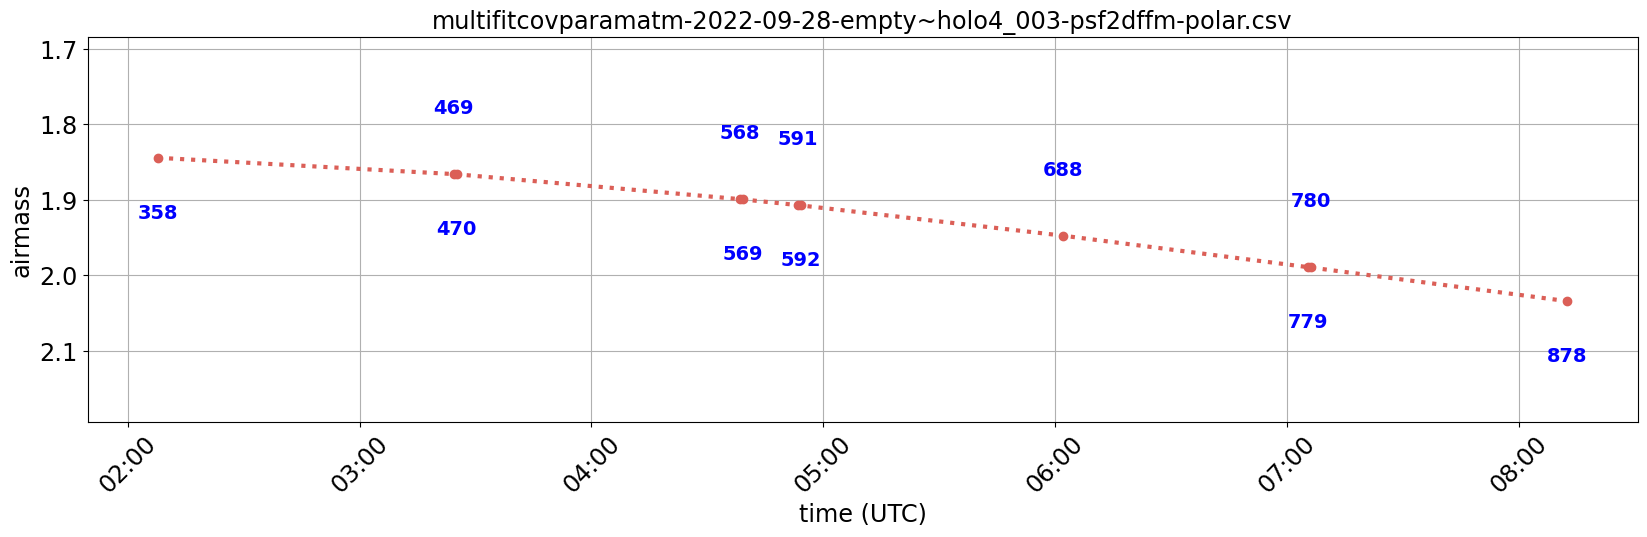

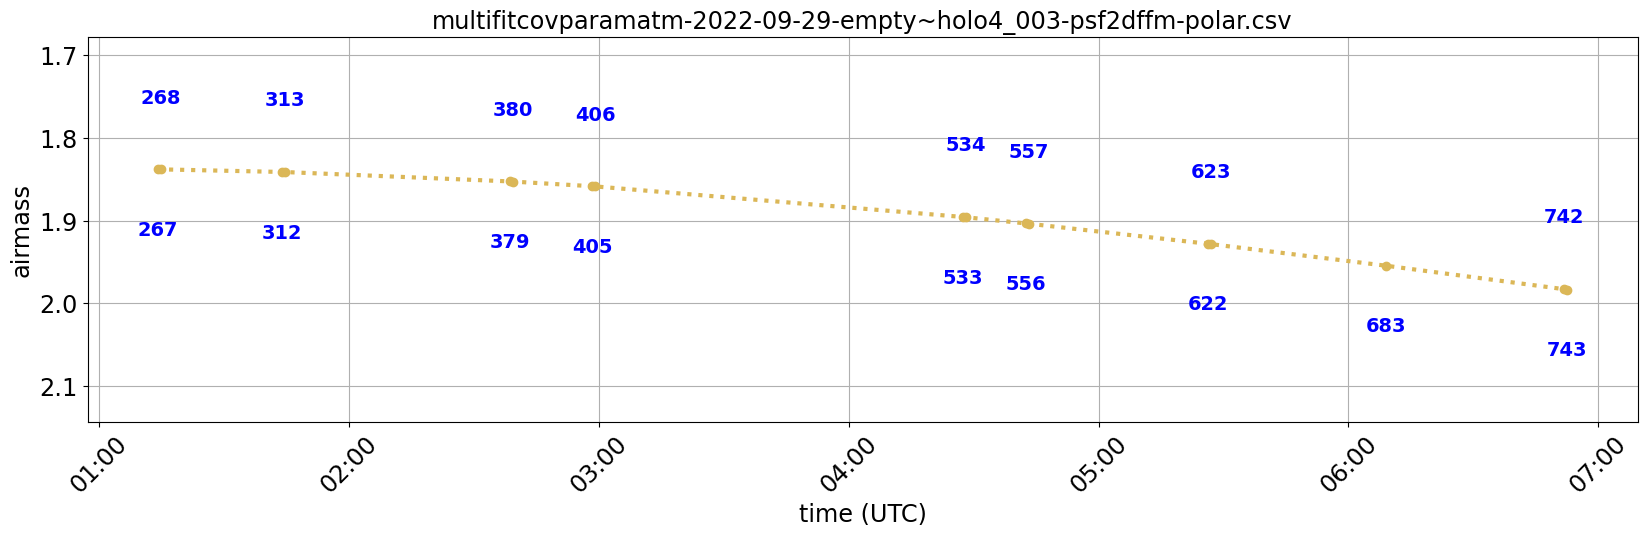

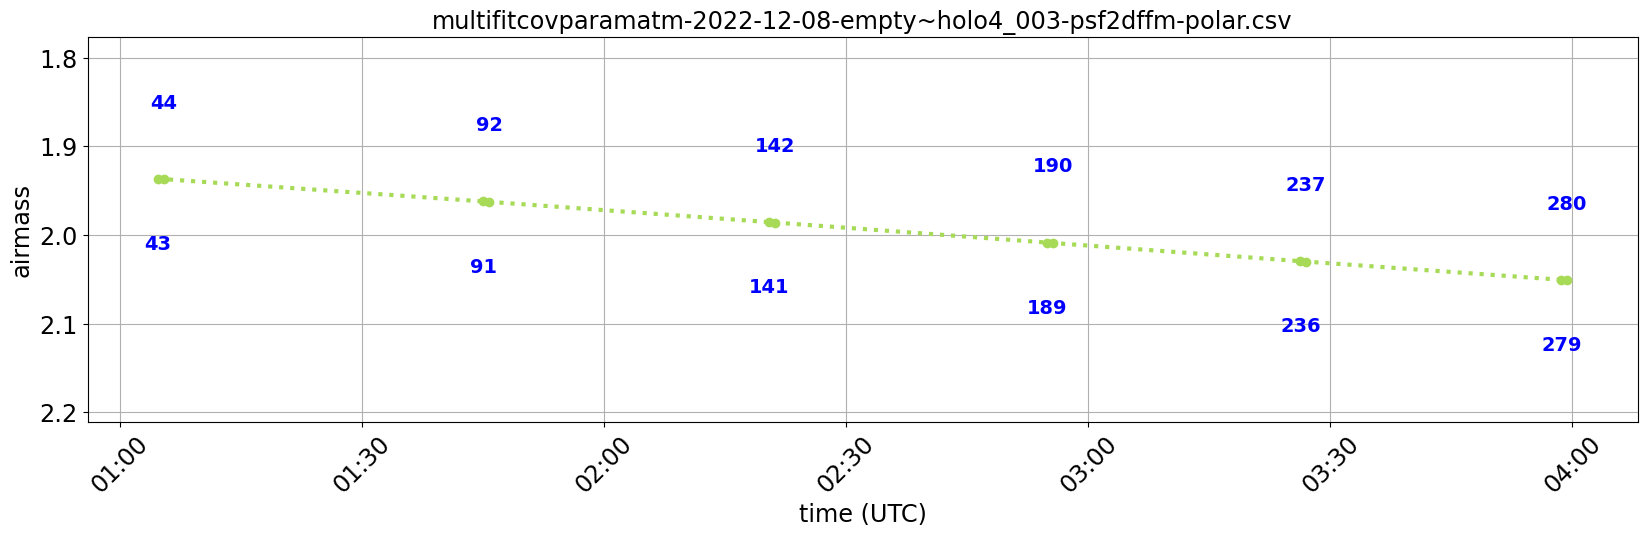

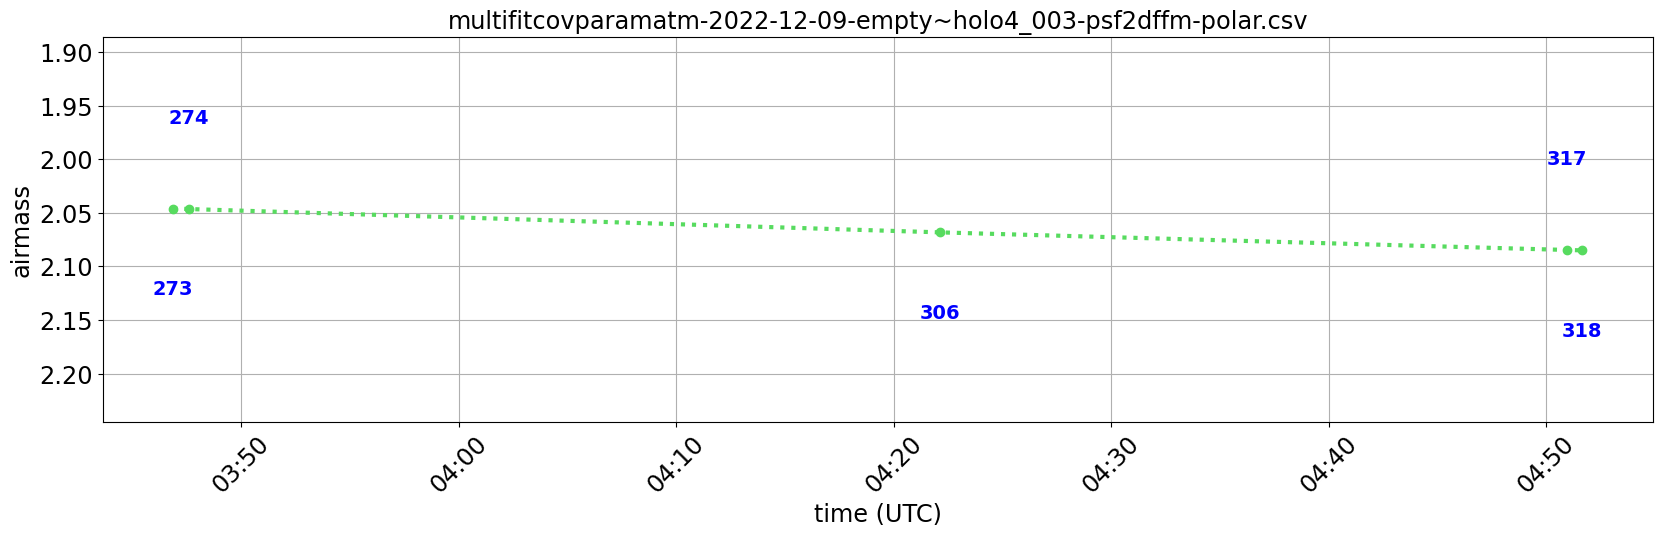

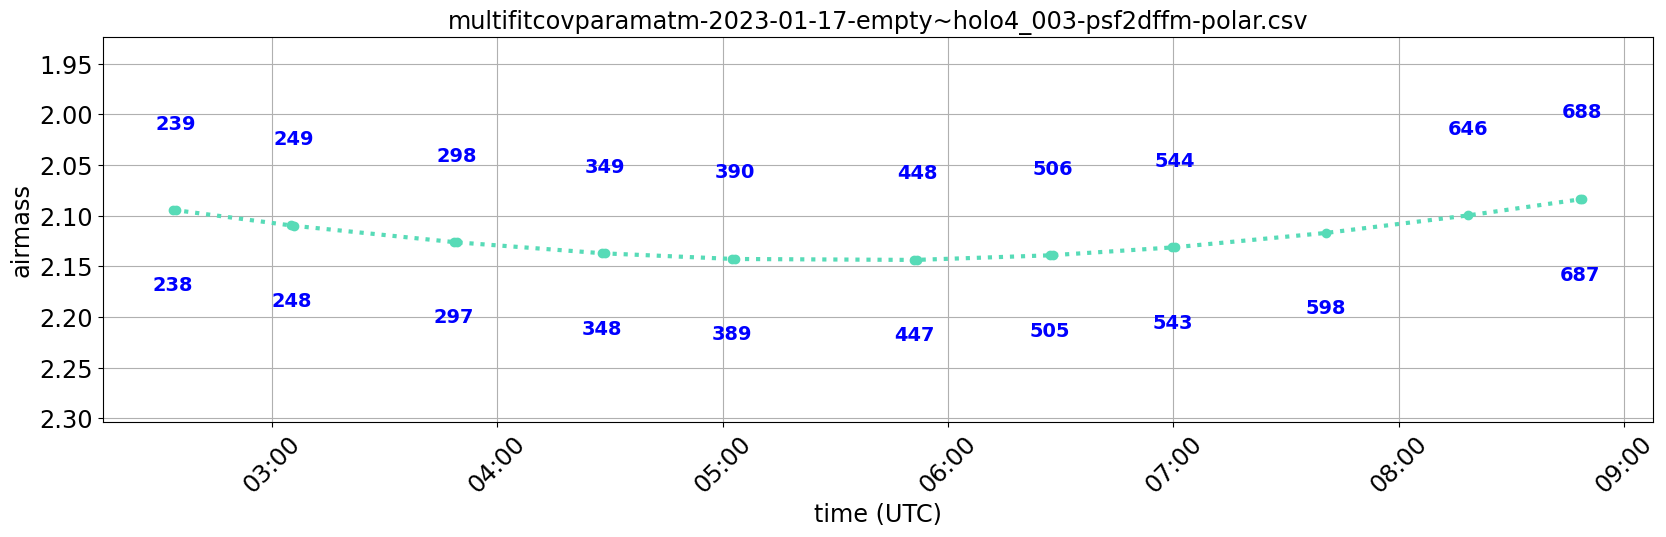

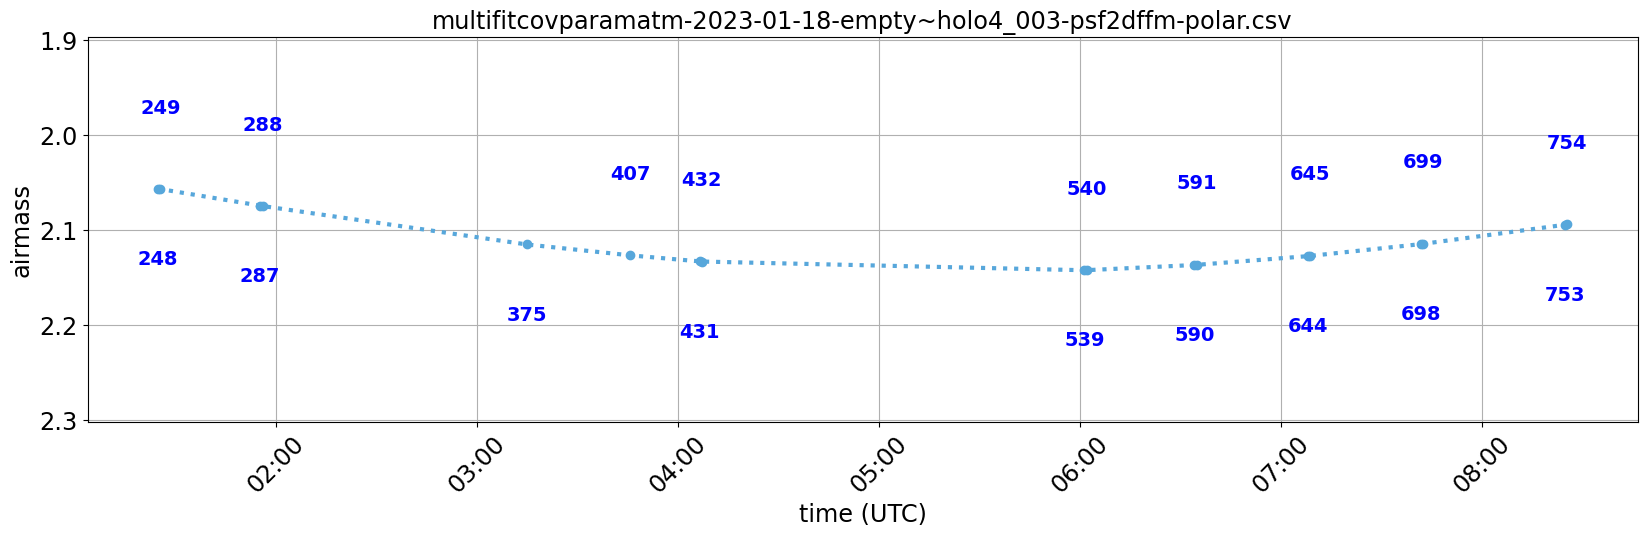

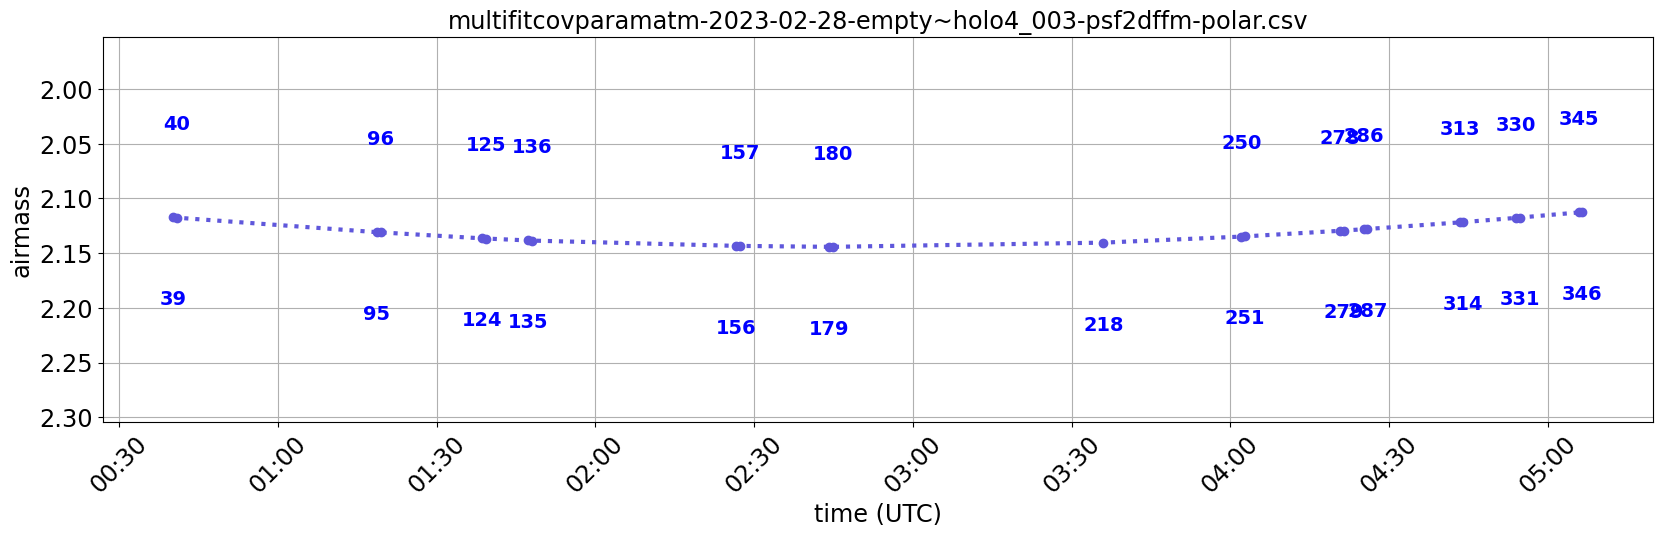

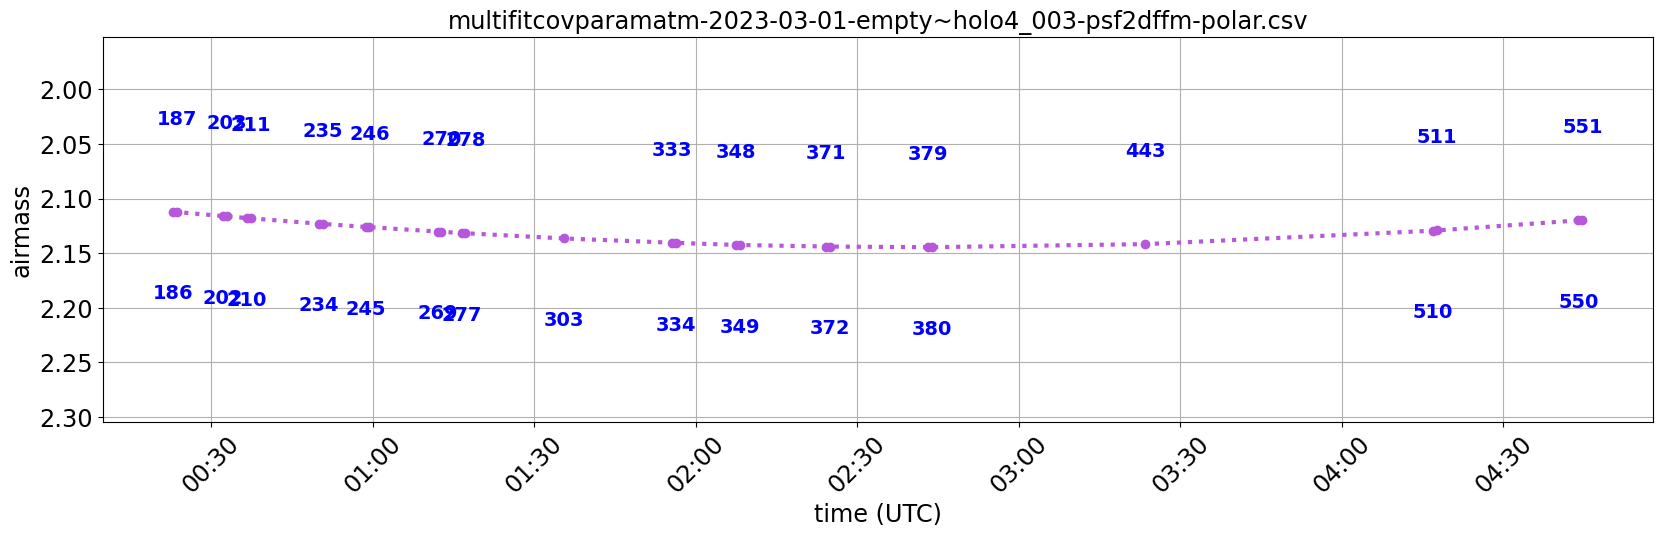

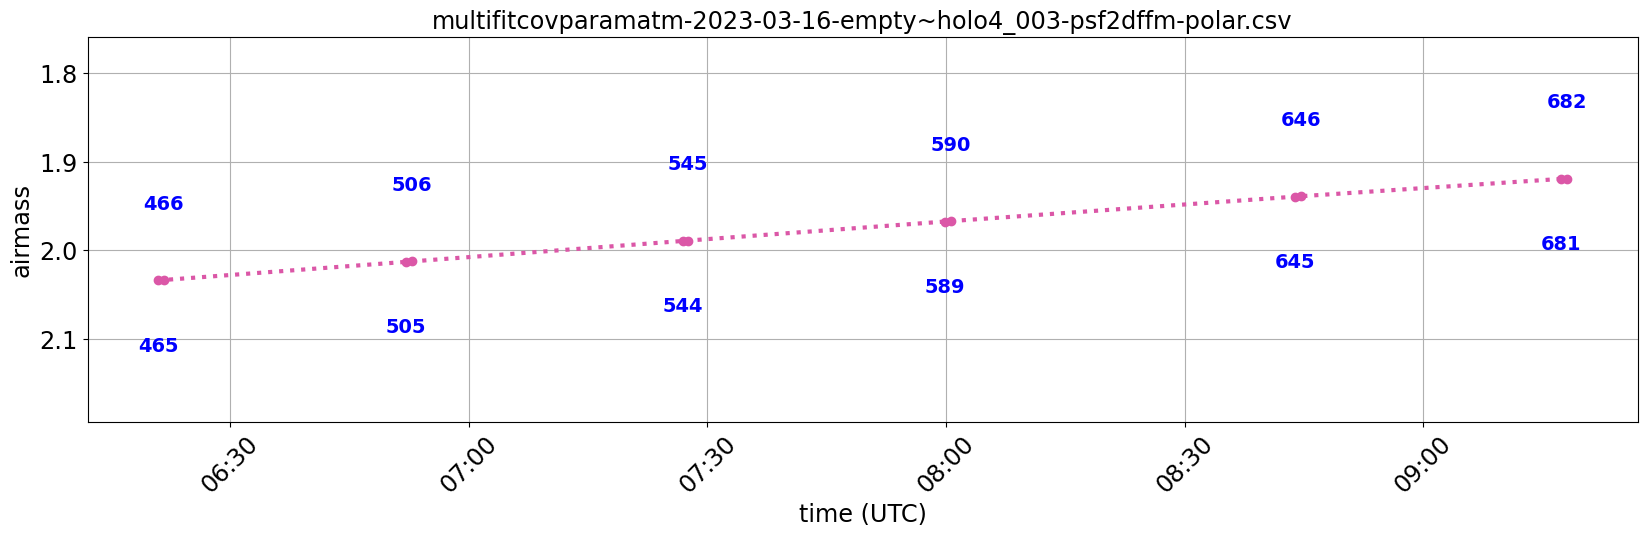

In [16]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    numbers = infos['number'].values
    airmasses = infos['spec_airmass'].values
    
    N= len(numbers)
    
    if N>0:
  
        # Create rectangle x coordinates
        startTime = all_datetime[0]
        endTime =  all_datetime[-1]

        # convert to matplotlib date representation
        start = mdates.date2num(startTime)
        end = mdates.date2num(endTime)
        width = end - start


        fig=plt.figure(figsize=(20,5))
    
        ax=fig.add_subplot(111)
        myFmt = mdates.DateFormatter('%H:%M')
        ax.xaxis.set_major_formatter(myFmt)

    

        y_shift= 0.08

  
        ax.plot(all_datetime,airmasses,'r:o',color=hls_colors[idx],lw=3)
        ax.xaxis.set_major_formatter(myFmt)
        ax.xaxis.set_tick_params(rotation=45)
        ax.set_xlabel("time (UTC)")
        ax.set_ylabel("airmass")
        ax.set_ylim(airmasses.min()-2*y_shift,airmasses.max()+2*y_shift)
        # Plot rectangle
        #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
        #ax2.add_patch(rect)   
        ax.invert_yaxis()
        ax.grid()


        for index in range(N):
            textstr= str(numbers[index])
            if index%2 == 0:
                dy = y_shift
            else:
                dy = -y_shift
            
            ax.text(all_datetime[index], airmasses[index] + dy , textstr,fontsize=14,fontweight="bold",ha='center',color="b" )
    
        ax.set_title(filenames[idx])
    
    plt.show()
    
    

# Function to find pairs

In [17]:
def FindPairs(df):
    all_datetime = [ Time(str_time).to_datetime() for str_time in df['spec_date_obs'] ]
    nn=len(all_datetime)
    difftimes = [ (all_datetime[n+1]-all_datetime[n]).seconds for n in range(nn-1) ]
    print(difftimes)
    all_pairs = []
    
    for idx,difft in   enumerate(difftimes):
        if difft<60:
            all_pairs.append(idx)
    return all_pairs

## Grey term

### Plot all grey in different figures

In [18]:
hls_colors = sns.color_palette("hls", NF)

In [19]:
df.columns

Index(['index', 'exposure', 'spec_date_obs', 'spec_target_label',
       'spec_filter_label', 'spec_airmass', 'spec_pressure',
       'spec_temperature', 'spec_humidity', 'spec_hour_angle',
       'spec_parallactic_angle', 'spec_camera_angle', 'spec_order',
       'spec_header_target', 'spec_header_redshift', 'spec_header_grating',
       'spec_header_rotangle', 'spec_header_d2ccd', 'spec_header_lshift',
       'spec_header_parangle', 'spec_header_targetx', 'spec_header_targety',
       'spec_header_lbda_ref', 'spec_header_pixshift', 'spec_header_psf_reg',
       'spec_header_trace_r', 'spec_header_chi2_fit', 'spec_header_a2_fit',
       'spec_header_am_fit', 'spec_header_meanfwhm', 'spec_header_version',
       'spec_header_rebin', 'spec_header_date-obs', 'spec_header_exptime',
       'spec_header_airmass', 'spec_header_dec', 'spec_header_ha',
       'spec_header_outtemp', 'spec_header_outpress', 'spec_header_outhum',
       'spec_header_filter', 'spec_header_cam_rot', 'spec_header_s_

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_74185/3523515846.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,optdepth,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel")


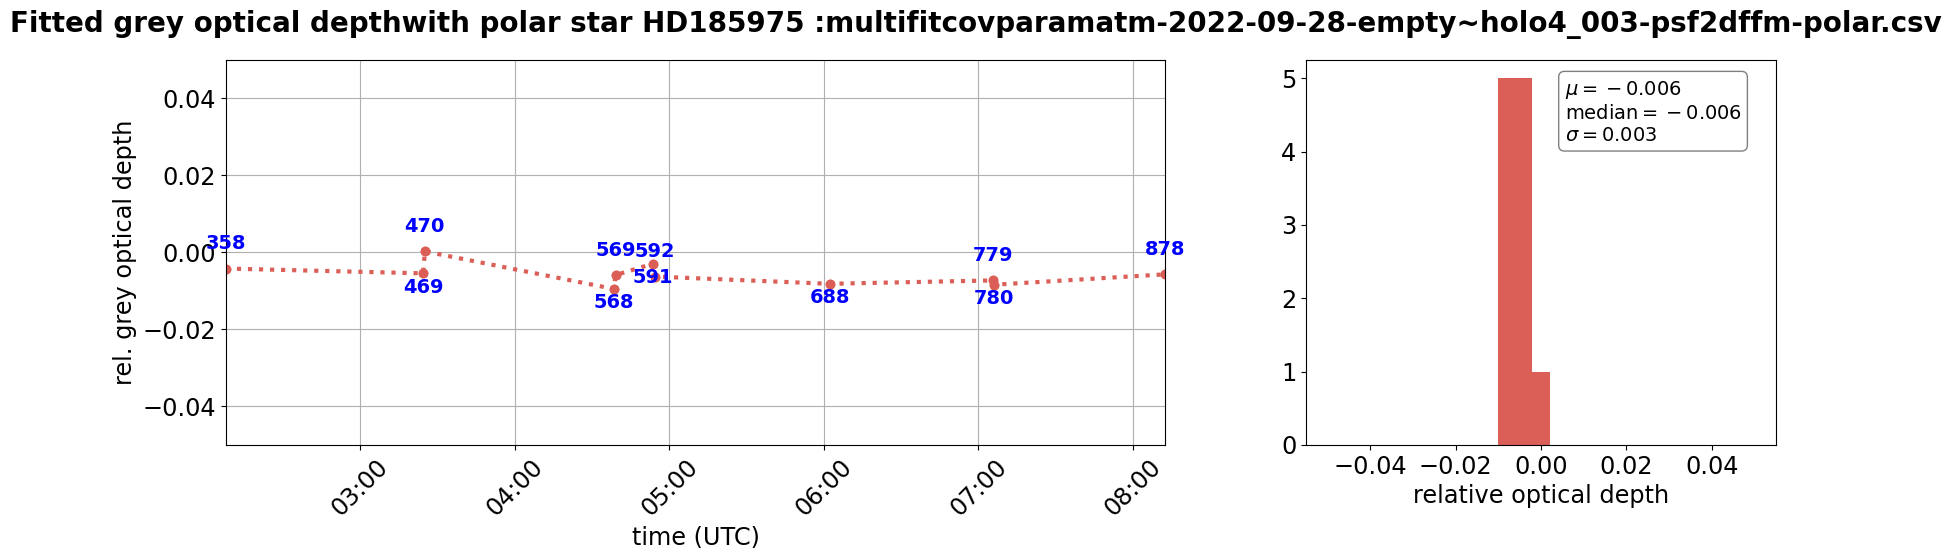

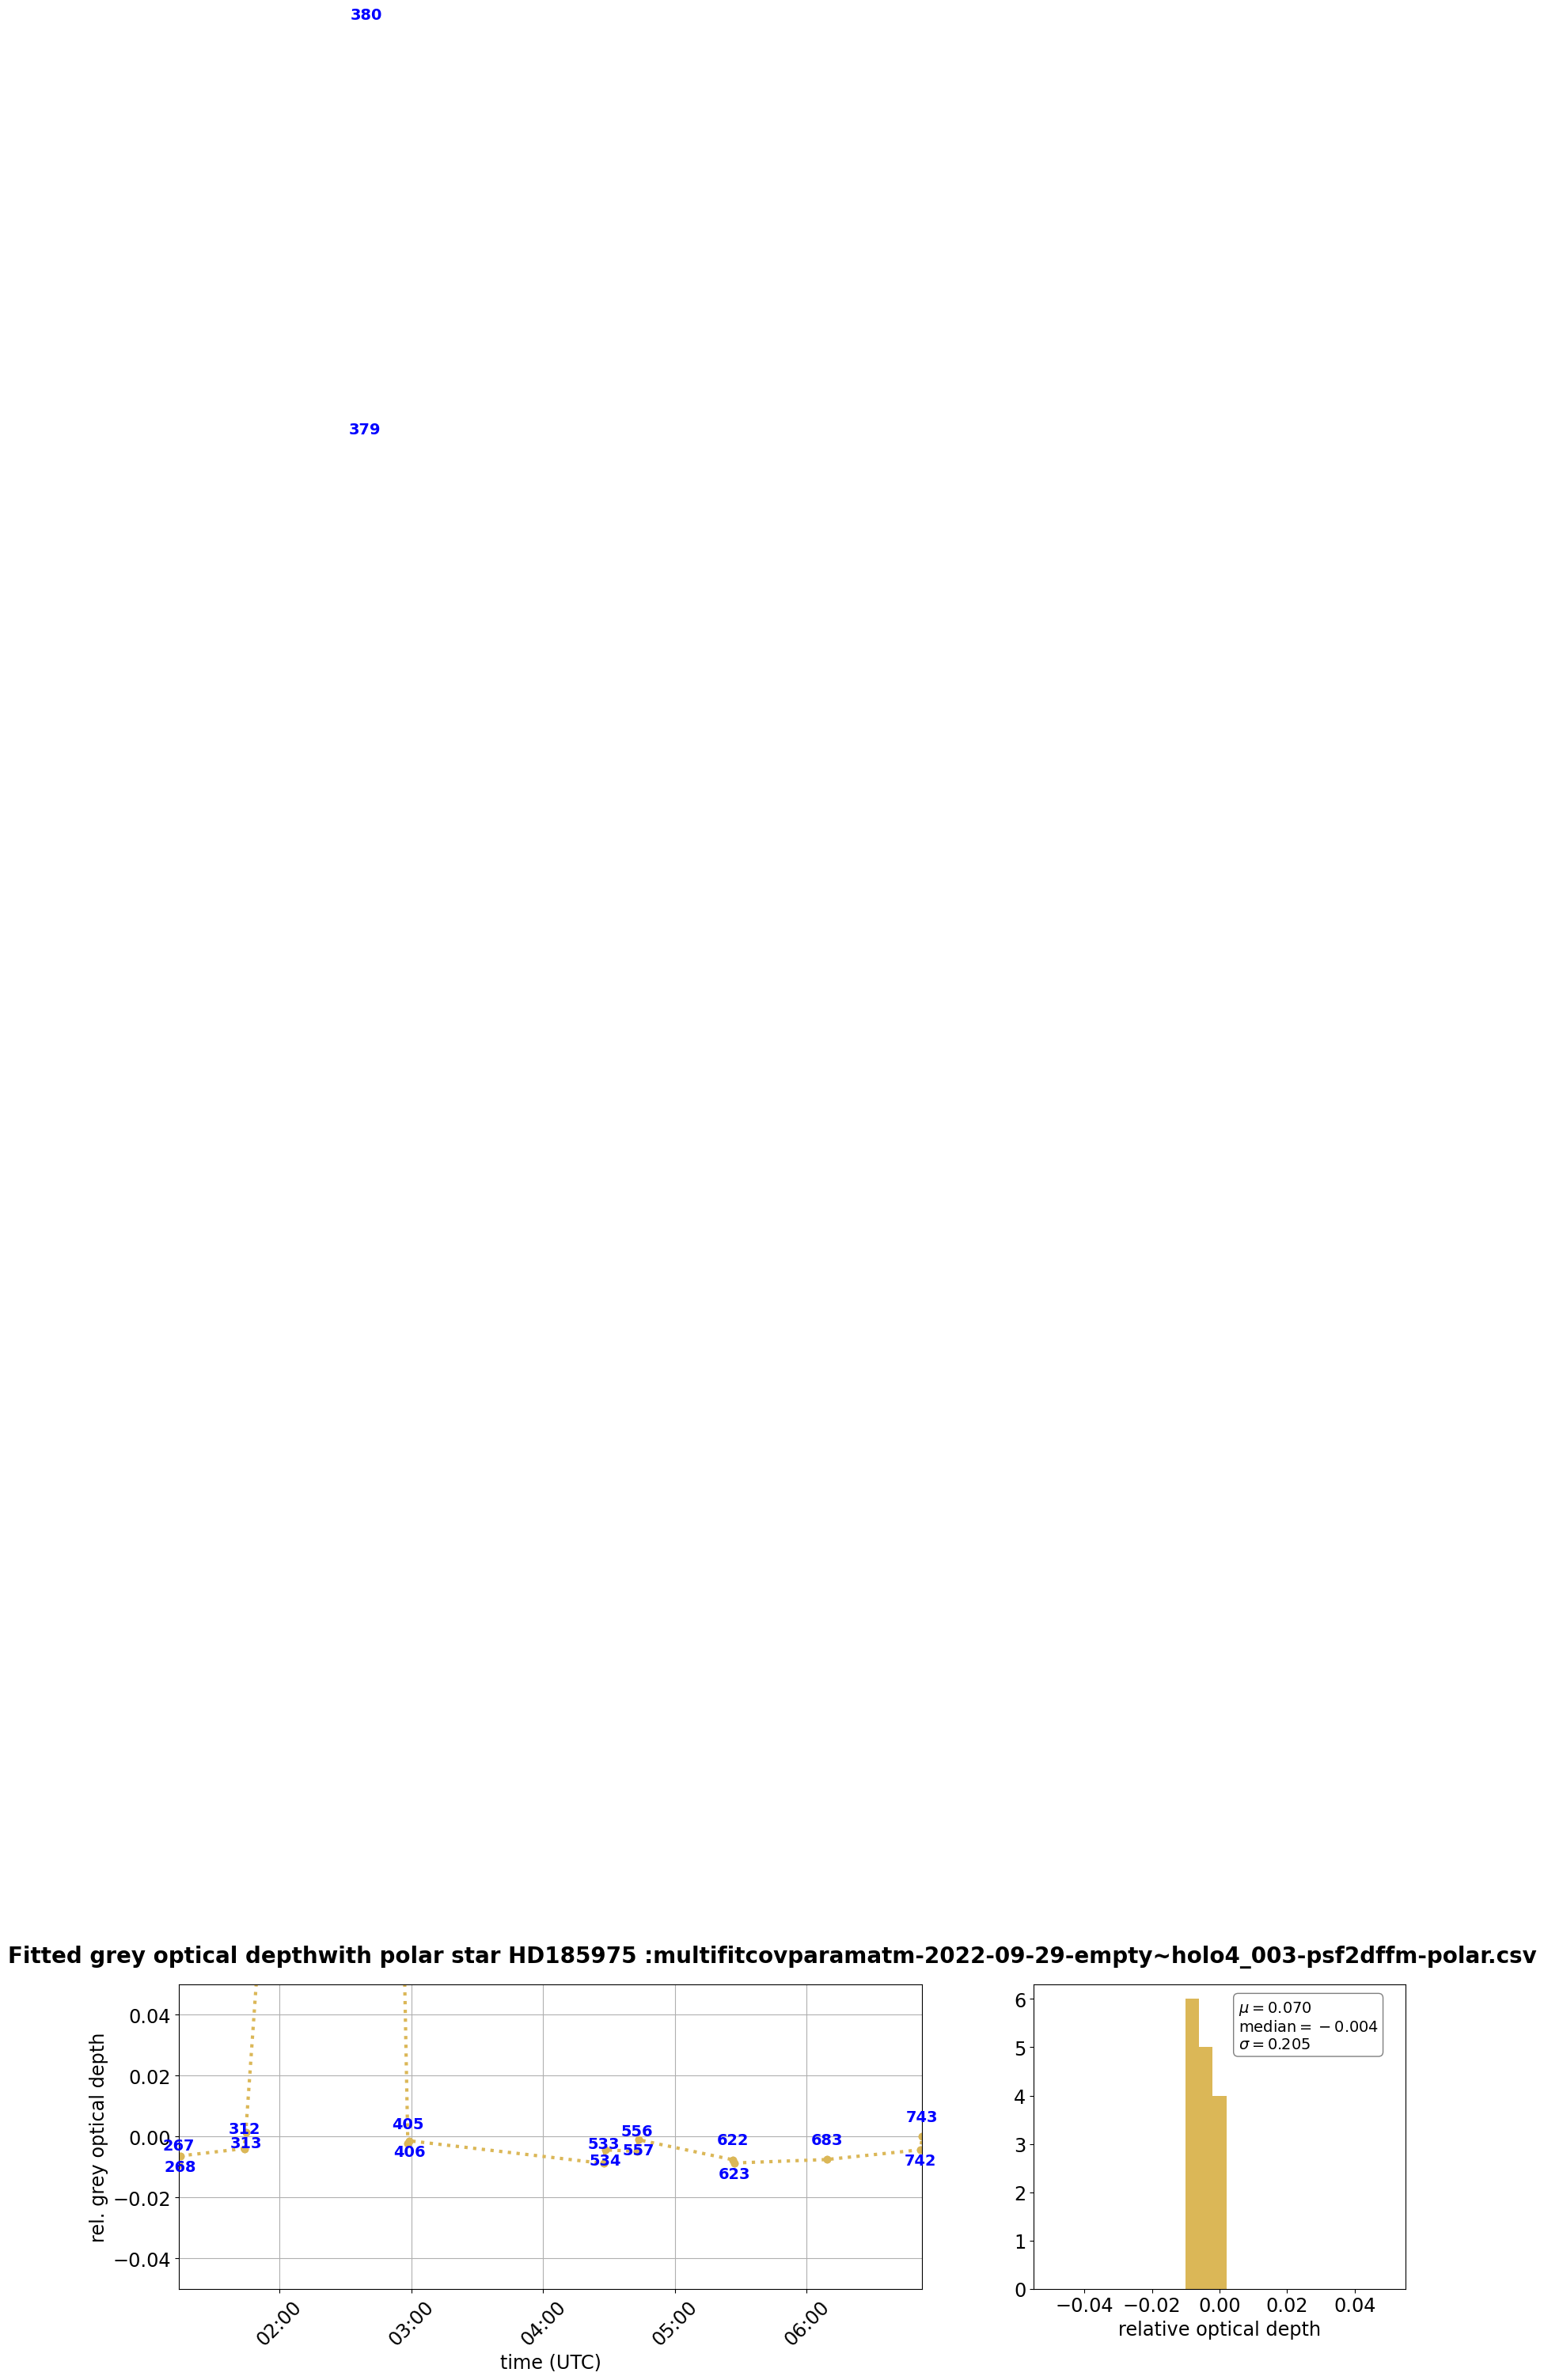

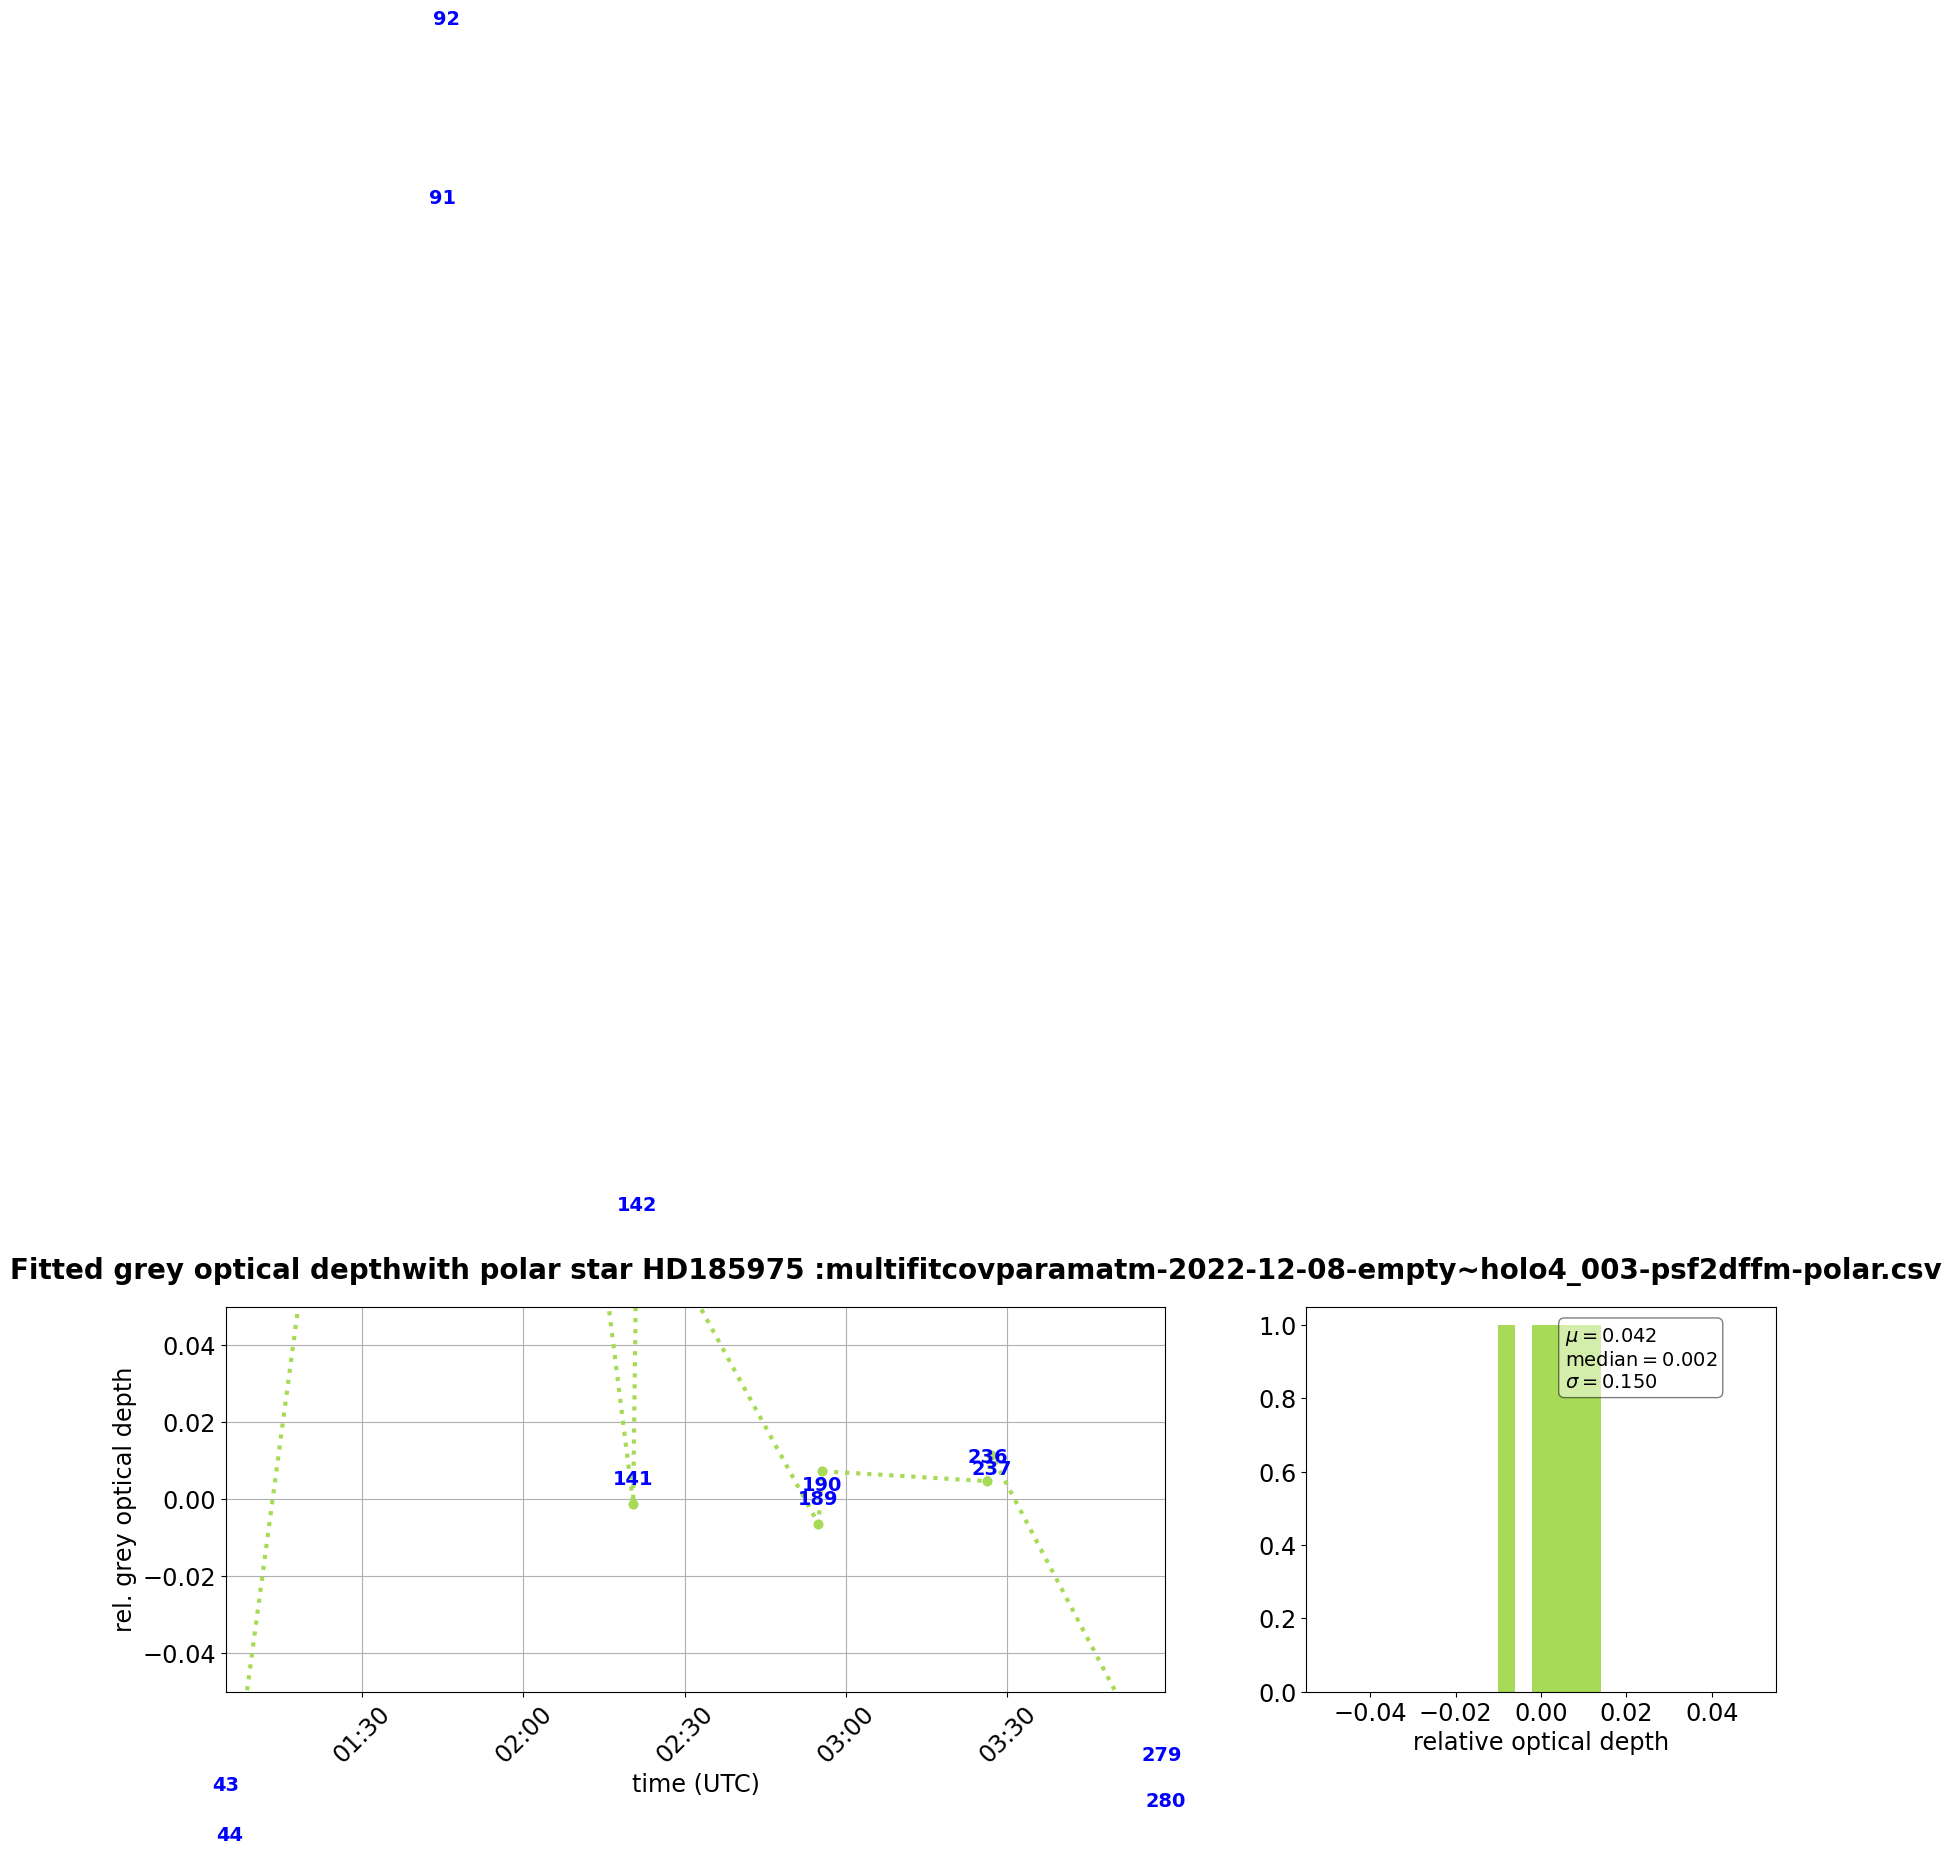

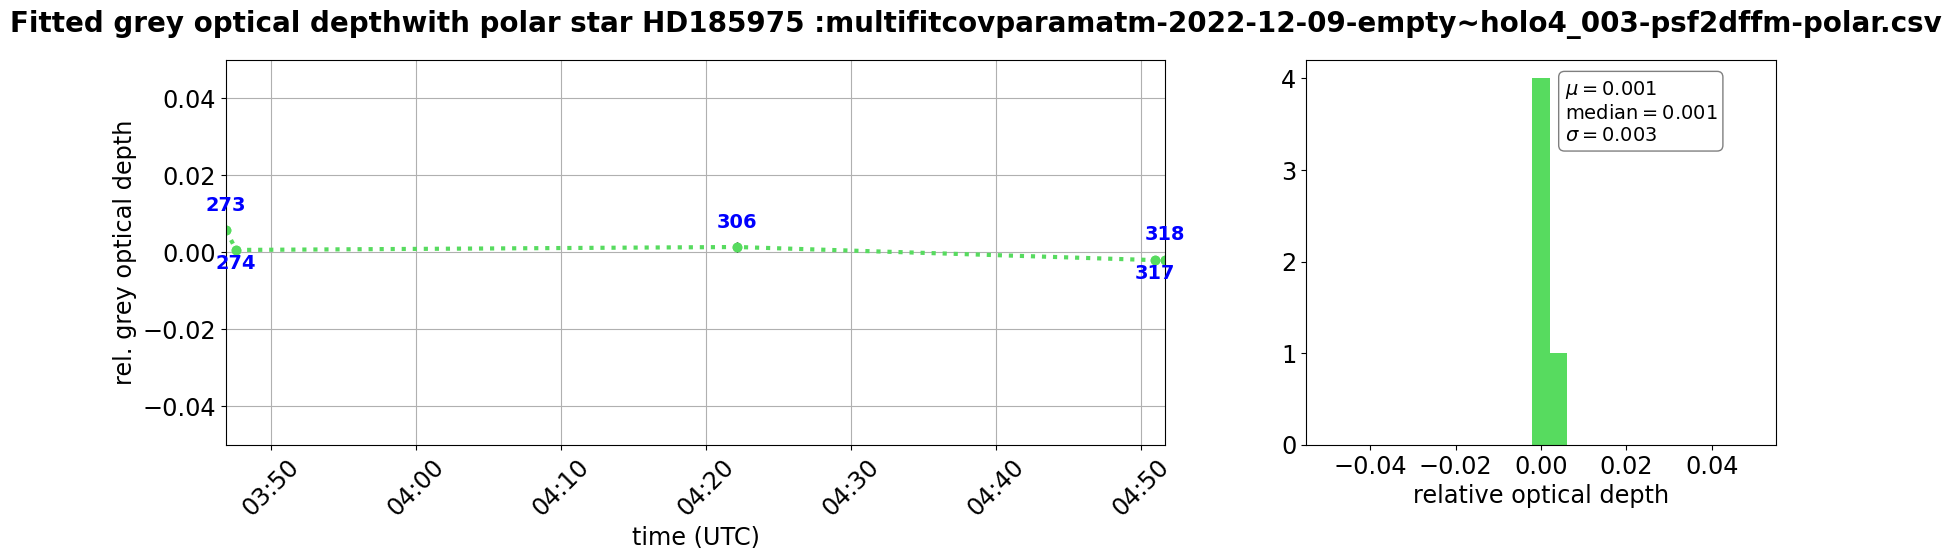

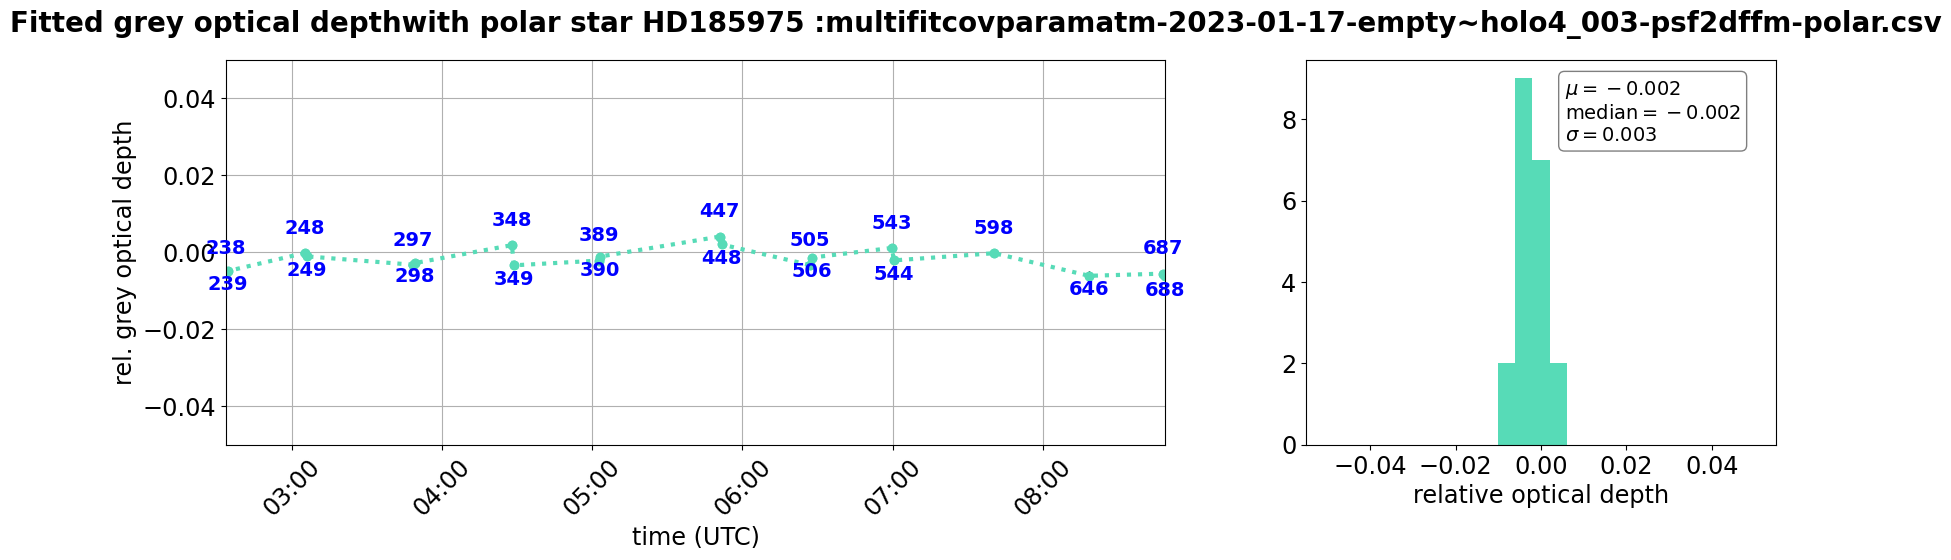

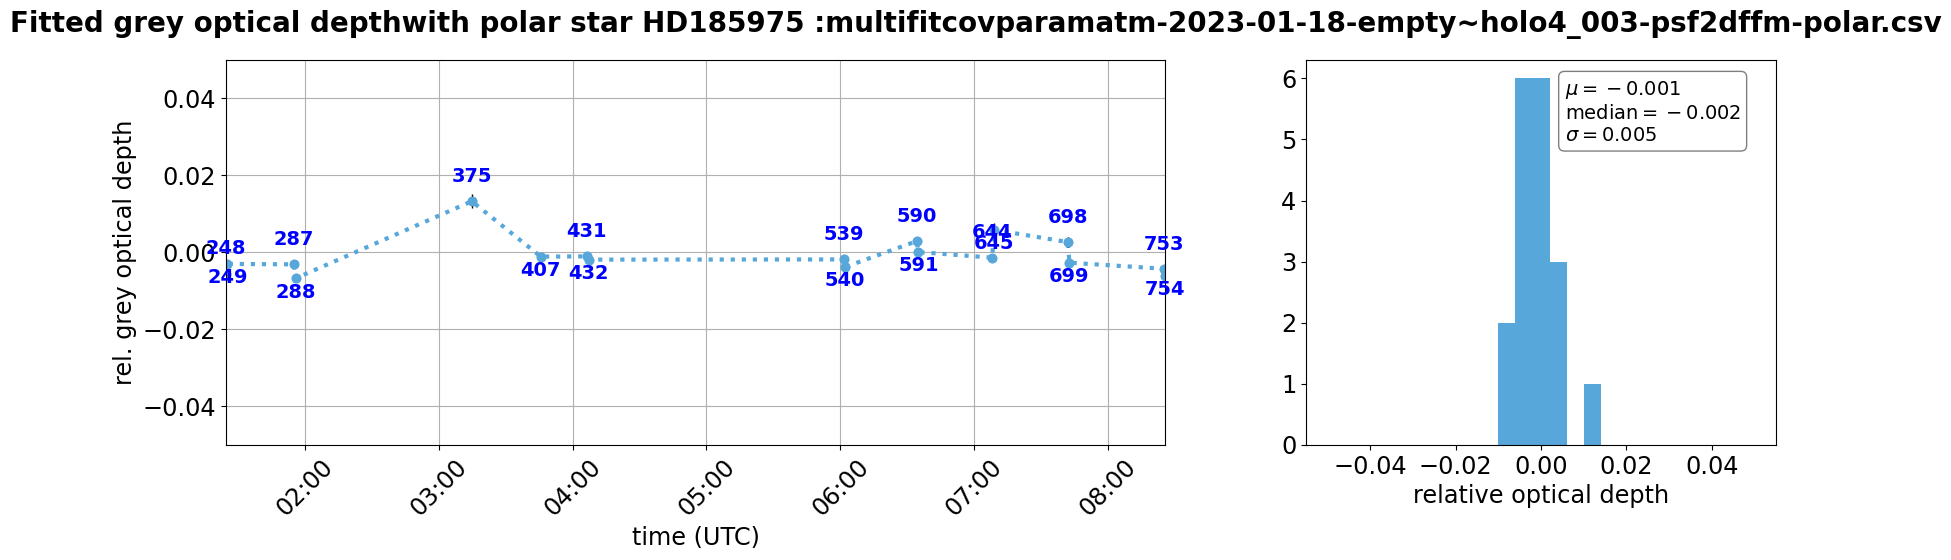

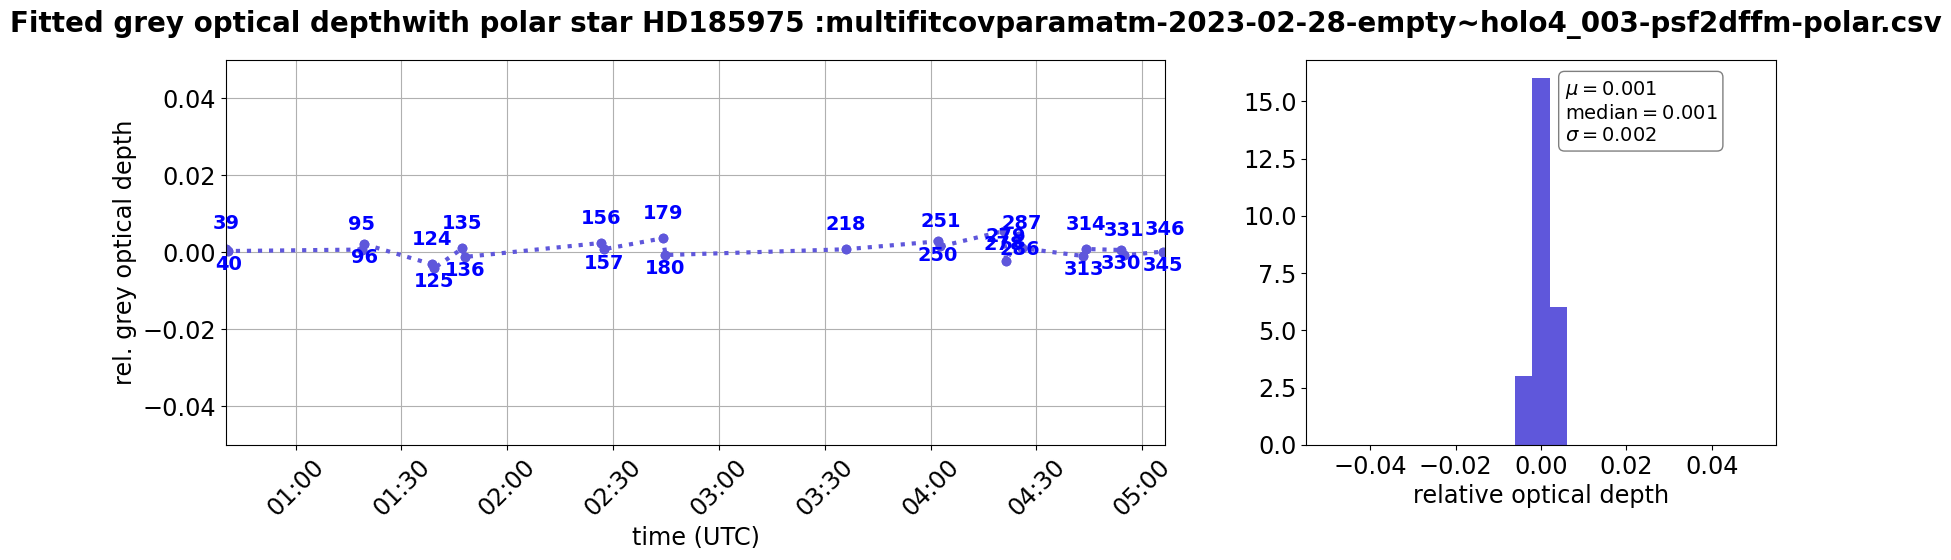

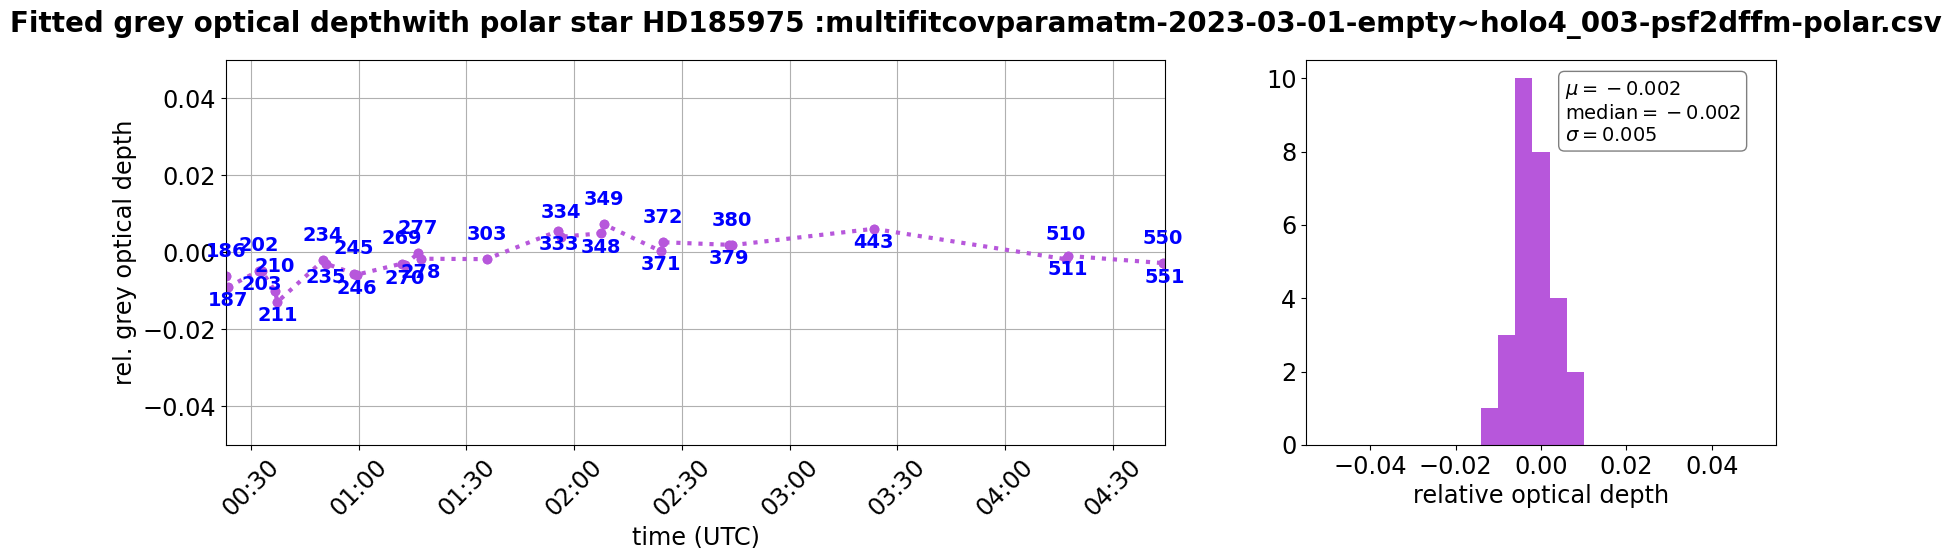

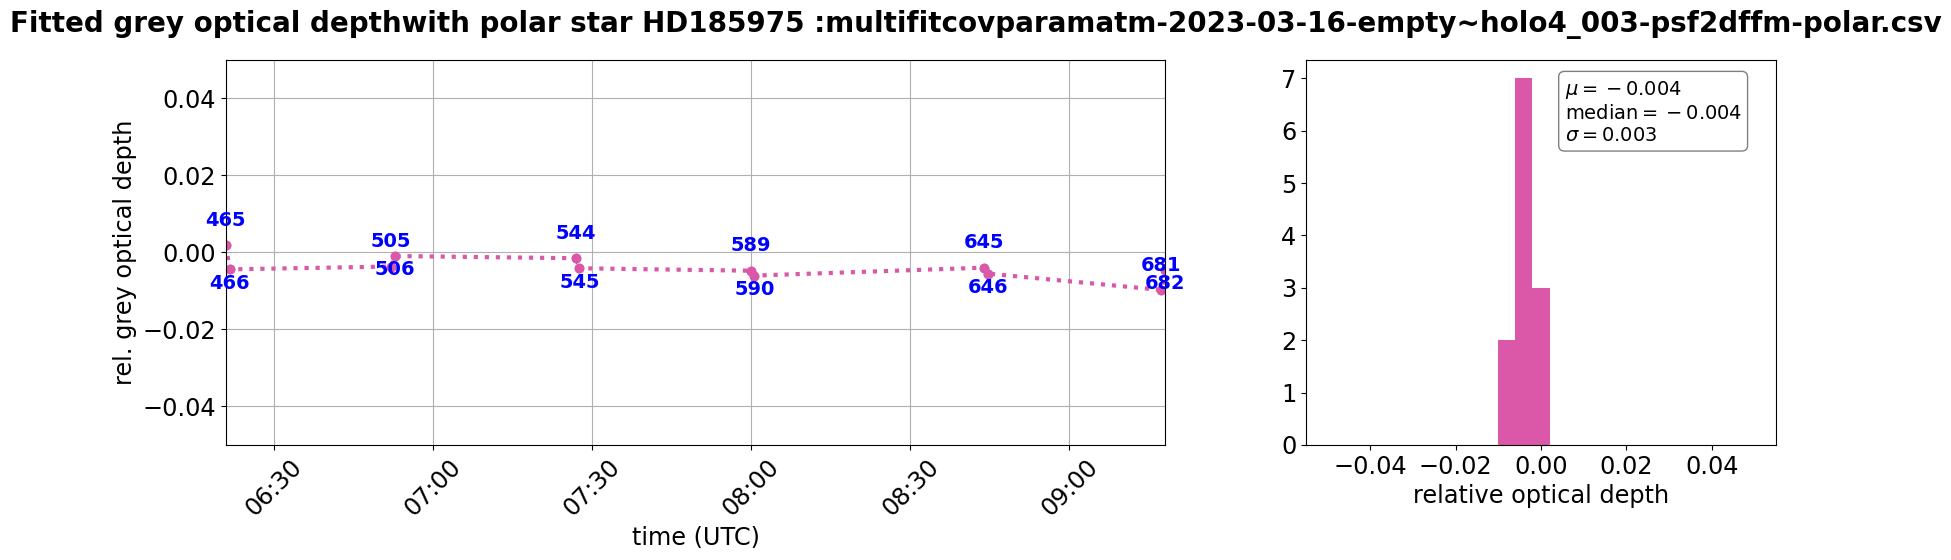

In [26]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    numbers = infos['number'].values
    
    #pwv= infos['pwv_avg'].values
    #epwv= infos['pwv_sig'].values
    
    grey = infos['grey_1'].values
    egrey = infos['egrey_1'].values
    airmass = infos['spec_airmass'].values
    
    optdepth = -np.log(grey)/airmass
    eoptdepth = 1/airmass*egrey/grey
    

    N= len(numbers)
    if N<1:
        continue
  
        

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]
    
    

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    fig=plt.figure(figsize=(20,5))
    gs = gridspec.GridSpec(1, 2,width_ratios=[3,1.5],figure=fig)
    
    ax= fig.add_subplot(gs[0,0])
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 

    y_shift= 0.005

  
    ax.plot(all_datetime,optdepth,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel")
    ax.errorbar(all_datetime,optdepth,yerr=eoptdepth,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1)
    
    
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("rel. grey optical depth")
    ax.set_ylim(optdepth.min()-2*y_shift,optdepth.max()+2*y_shift)
    ax.set_xlim(start,end)
    
    ax.grid()
    ax.set_ylim(0-0.05,0.05)


    for index in range(N):
        textstr= str(numbers[index])
        
        if index%2 == 0:
            dy = y_shift
        else:
            dy = -y_shift
            
        ax.text(all_datetime[index], optdepth[index] + dy , textstr,fontsize=14,fontweight="bold",ha='center',color="b" )
    
    
    
    ax= fig.add_subplot(gs[0,1])
    ax.hist(optdepth,bins=25,range=(-0.05,0.05),facecolor=hls_colors[idx])
    ax.set_xlabel("relative optical depth")
    
    mu = optdepth.mean()
    median = np.median(optdepth)
    sigma =optdepth.std()
    
    textstr = '\n'.join((
    r'$\mu=%.3f$' % (mu, ),
    r'$\mathrm{median}=%.3f$' % (median, ),
    r'$\sigma=%.3f$' % (sigma, )))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.55, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

    
    
    
    if FLAG_SELECT_POLAR:
        the_title = "Fitted grey optical depthwith polar star HD185975 :" + filenames[idx]
    else:
        the_title = "Fitted grey optical depth with all stars :" + filenames[idx]
    plt.suptitle(the_title,fontsize="20",fontweight="bold")
    plt.show()
    
    

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_74185/456101692.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,optdepth,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])


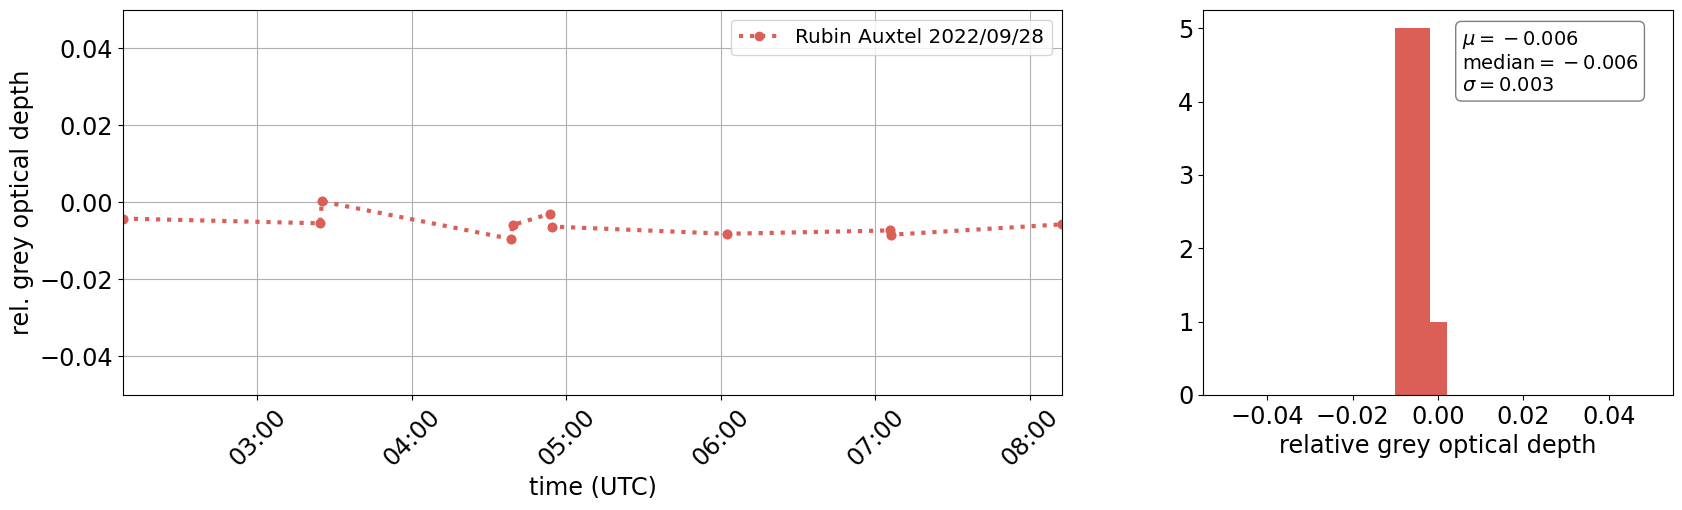

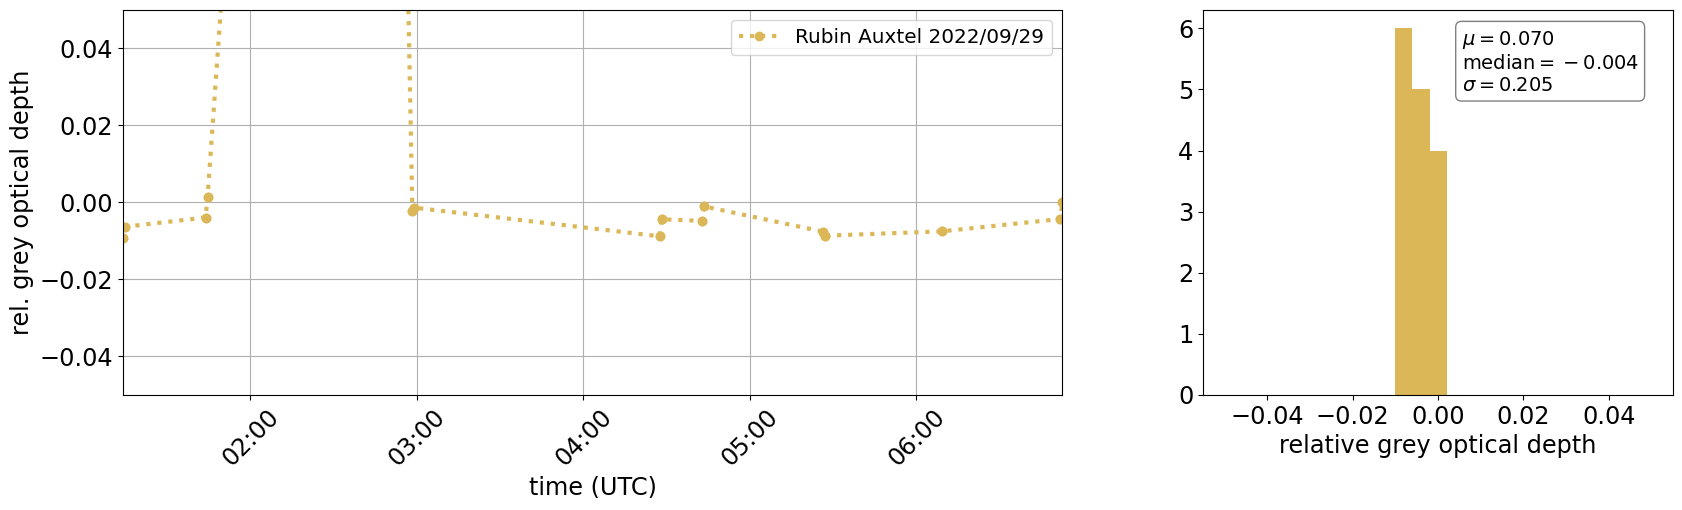

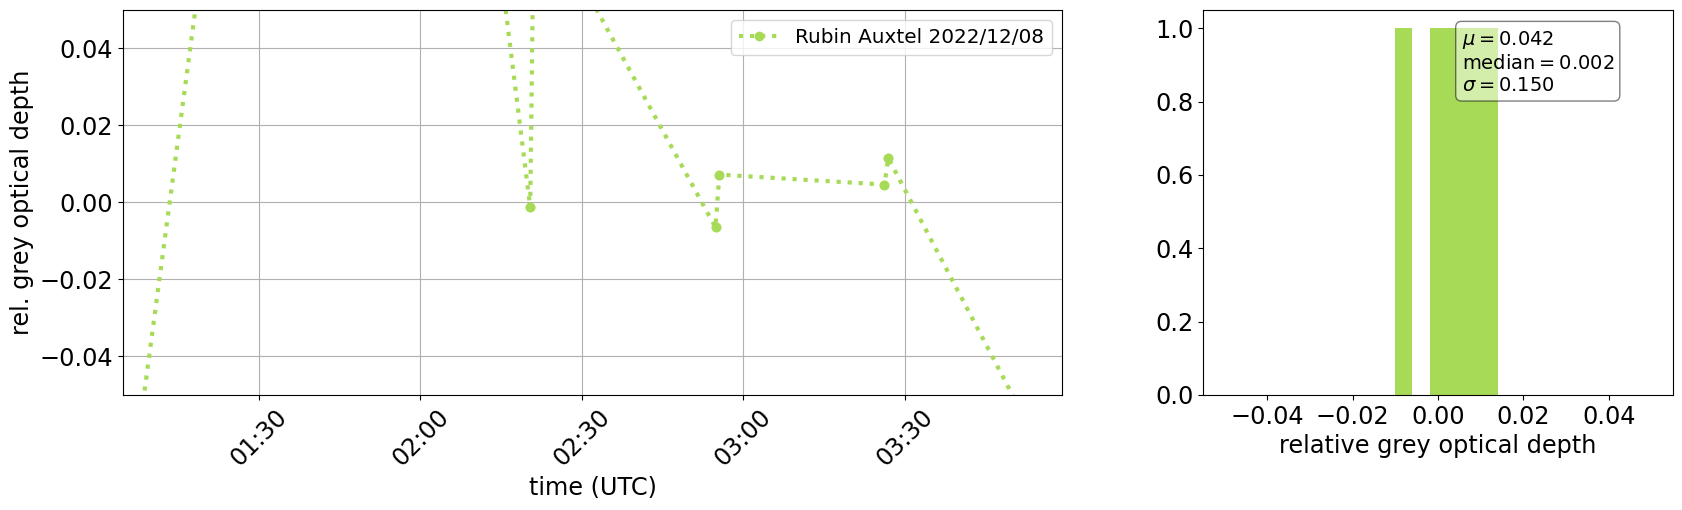

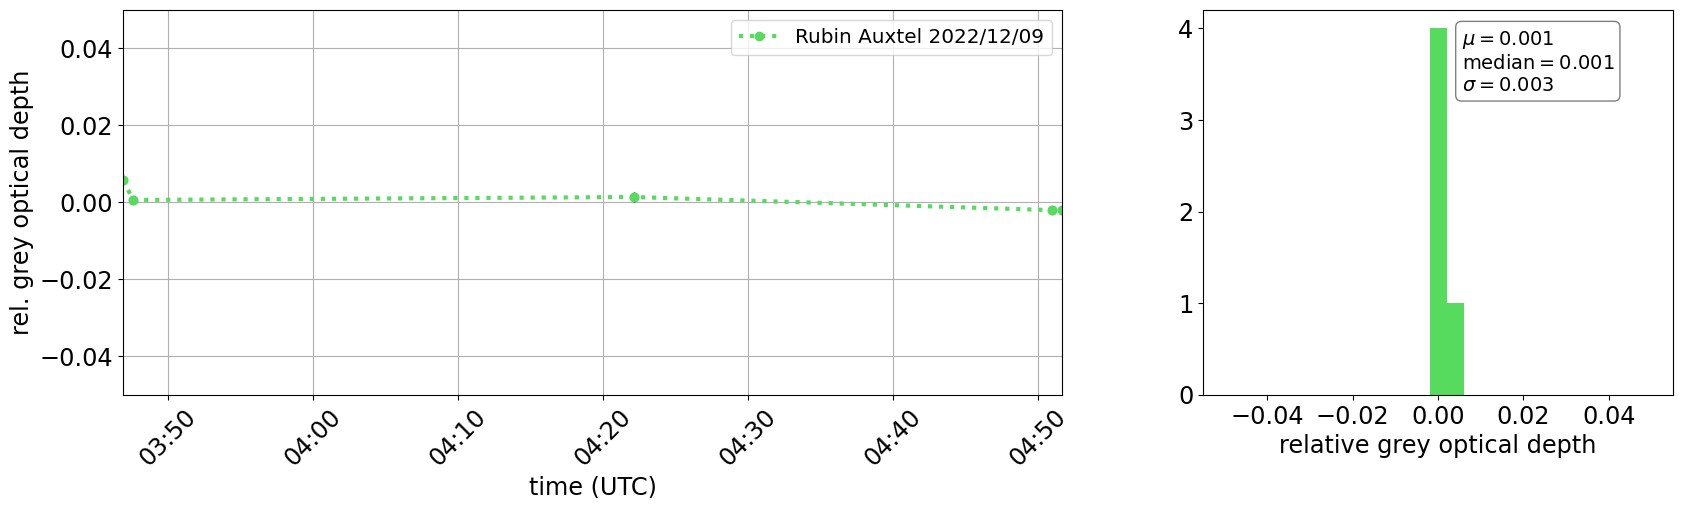

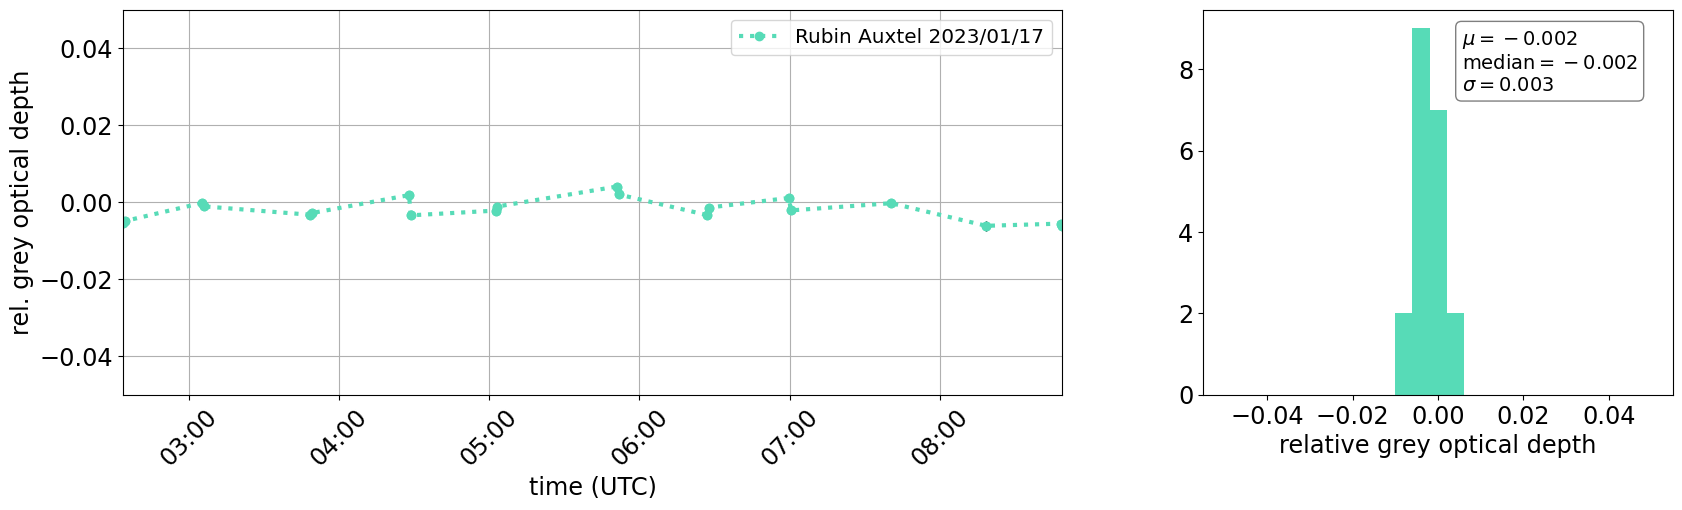

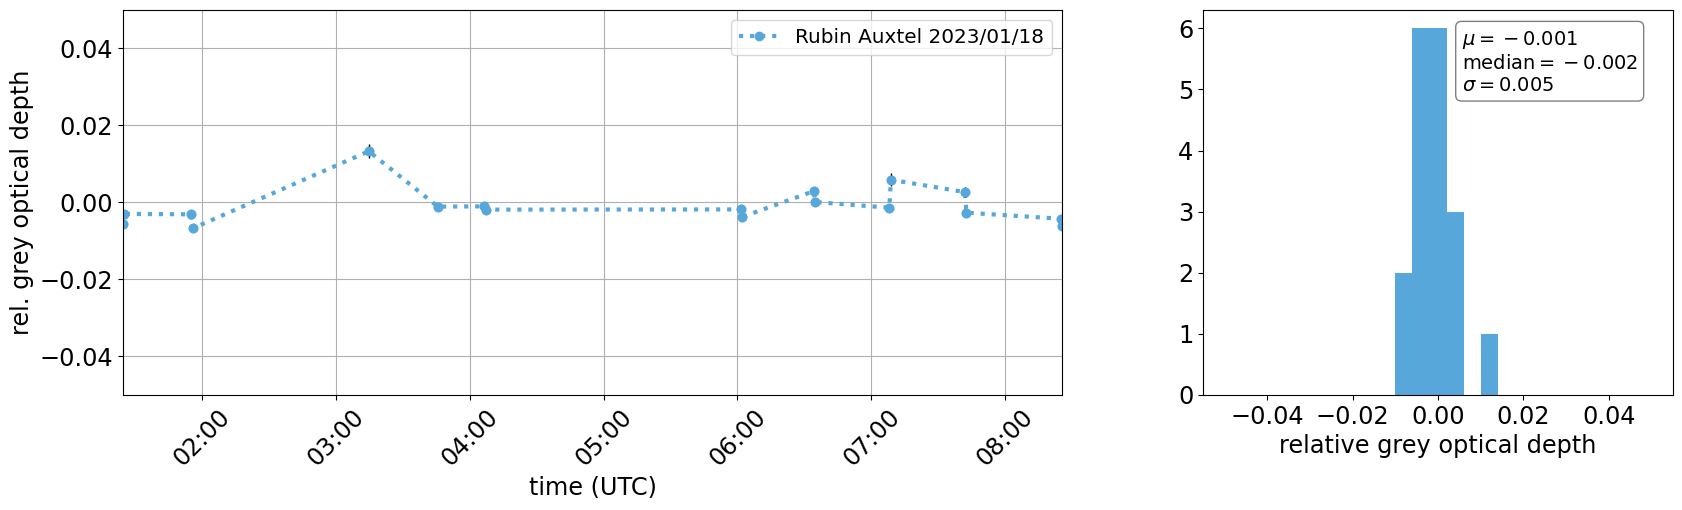

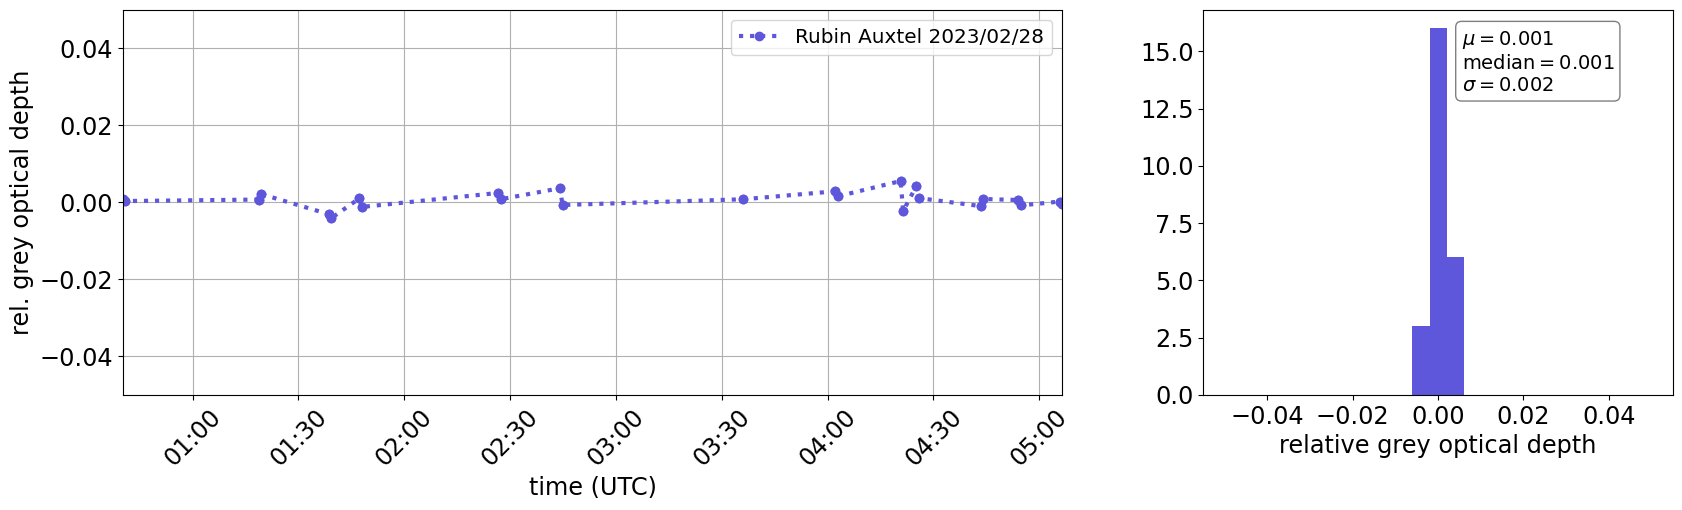

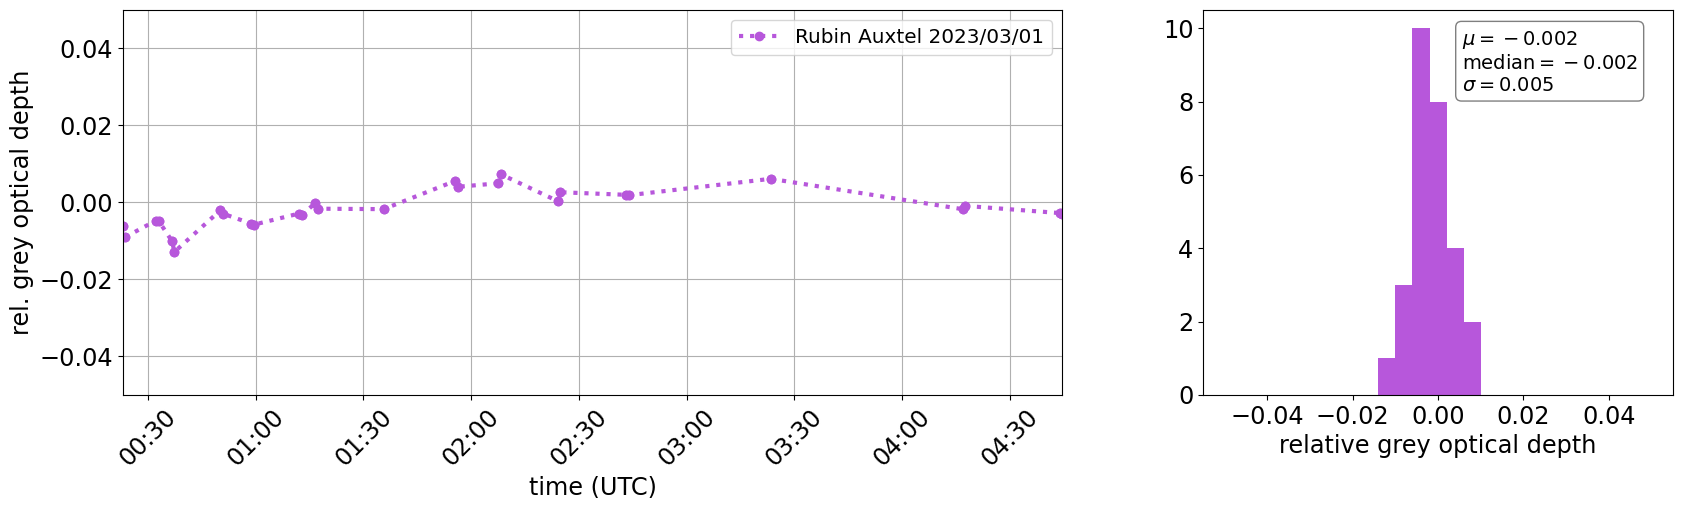

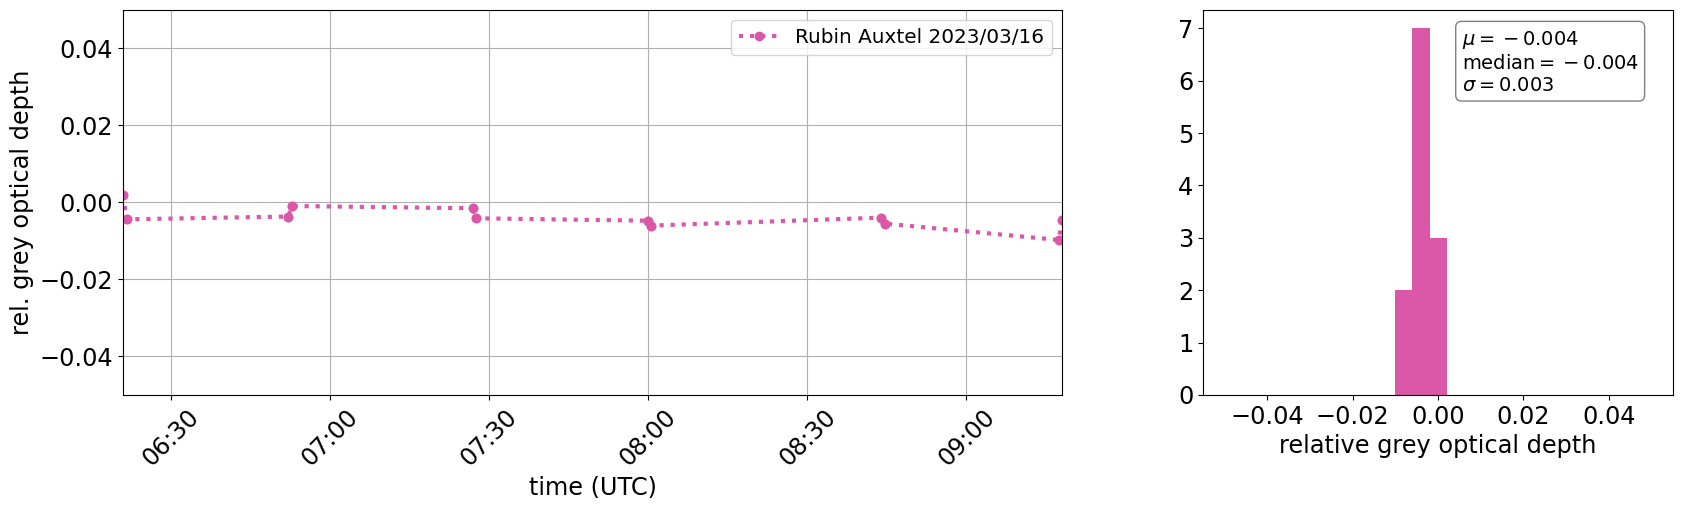

In [27]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    numbers = infos['number'].values
    
    grey = infos['grey_1'].values
    egrey = infos['egrey_1'].values
    airmass = infos['spec_airmass'].values
    
    optdepth = -np.log(grey)/airmass
    eoptdepth = 1/airmass*egrey/grey
    

    N= len(numbers)
    if N<1:
        continue
  
        

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    fig=plt.figure(figsize=(20,5))
    gs = gridspec.GridSpec(1, 2,width_ratios=[3,1.5],figure=fig)
    
    ax= fig.add_subplot(gs[0,0])
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 

  
    ax.plot(all_datetime,optdepth,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])
    ax.errorbar(all_datetime,optdepth,yerr=eoptdepth,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1)
    
   
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("rel. grey optical depth")
    ax.legend()

    ax.set_xlim(start,end)
    ax.grid()
    ax.set_ylim(-0.05,0.05)

    
    ax= fig.add_subplot(gs[0,1])
    ax.hist(optdepth,bins=25,range=(-0.05,0.05),facecolor=hls_colors[idx])
    ax.set_xlabel("relative grey optical depth")
    
    mu = optdepth.mean()
    median = np.median(optdepth)
    sigma = optdepth.std()
    
    textstr = '\n'.join((
    r'$\mu=%.3f$' % (mu, ),
    r'$\mathrm{median}=%.3f$' % (median, ),
    r'$\sigma=%.3f$ ' % (sigma, )))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.55, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

    
    
    
    if FLAG_SELECT_POLAR:
        the_title = "Fitted relative optical depth with polar star HD185975 : " + tags[idx]
    else:
        the_title = "Fitted relative optical with all stars : " + tags[idx]
    #plt.suptitle(the_title,fontsize="20",fontweight="bold")
    plt.show()
    
    

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_74185/3125486811.py:52: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,optdepth,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])


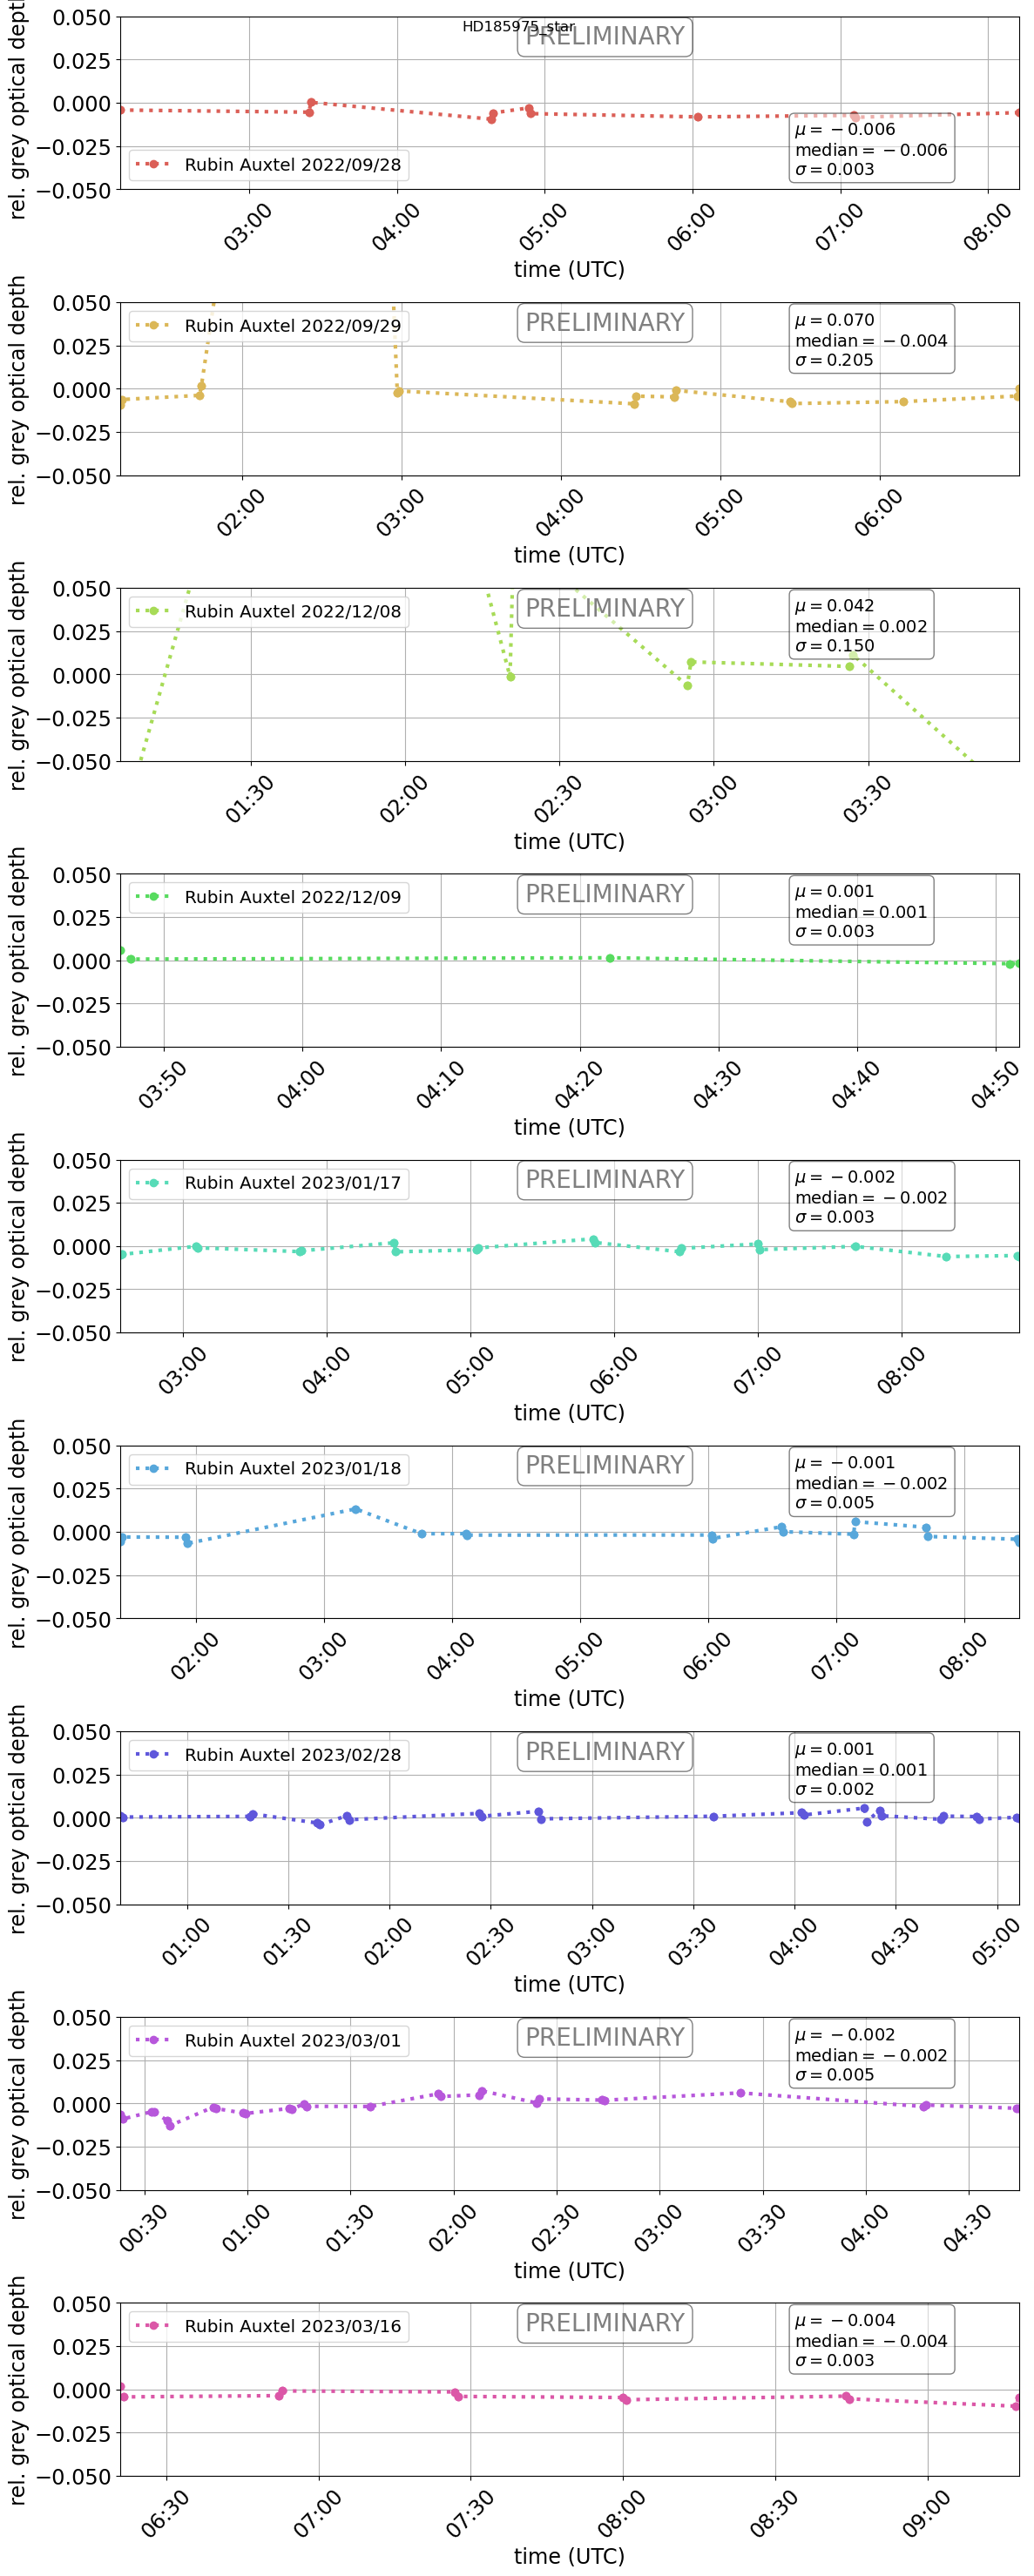

In [29]:
fig = plt.figure(figsize=(12,30))

gs = gridspec.GridSpec(9, 1,height_ratios=[1,1,1,1,1,1,1,1,1],figure=fig)


for idx,infos in enumerate(all_df):
    
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    numbers = infos['number'].values
    

    grey = infos['grey_1'].values
    egrey = infos['egrey_1'].values
    airmass = infos['spec_airmass'].values
    
    optdepth = -np.log(grey)/airmass
    eoptdepth = 1/airmass*egrey/grey
    
    
    mu = optdepth.mean()
    median = np.median(optdepth)
    sigma = optdepth.std()
    
   
    

    N= len(numbers)
    if N<1:
        continue
  
        

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start

   
    
    ax= fig.add_subplot(gs[idx,0])
    
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 
  
    ax.plot(all_datetime,optdepth,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])
    ax.errorbar(all_datetime,optdepth,yerr=eoptdepth,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1)
    
    
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("rel. grey optical depth")
    if idx == 0:
        ax.legend(loc='lower left')
    else:
        ax.legend(loc='upper left')
        
        
    textstr = '\n'.join((
    r'$\mu=%.3f$ ' % (mu, ),
    r'$\mathrm{median}=%.3f$ ' % (median, ),
    r'$\sigma=%.3f$' % (sigma, )))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    if idx ==0:
        ax.text(0.75, 0.40, textstr, transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
    else:
        ax.text(0.75, 0.95, textstr, transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
        
    ax.text(0.45, 0.95, "PRELIMINARY", transform=ax.transAxes,color="grey" ,fontsize=20,verticalalignment='top', bbox=props)
        
    ax.set_xlim(start,end)
 
    ax.grid()
    ax.set_ylim(-0.05,0.05)


plt.suptitle(tag_stars)
plt.tight_layout()
figname = f"fig_greyoptdepth_prelim-2023_{tag_stars}.png"
plt.savefig(figname)
plt.show()
    

## Find pairs

In [30]:
all_df[0].columns

Index(['index', 'exposure', 'spec_date_obs', 'spec_target_label',
       'spec_filter_label', 'spec_airmass', 'spec_pressure',
       'spec_temperature', 'spec_humidity', 'spec_hour_angle',
       'spec_parallactic_angle', 'spec_camera_angle', 'spec_order',
       'spec_header_target', 'spec_header_redshift', 'spec_header_grating',
       'spec_header_rotangle', 'spec_header_d2ccd', 'spec_header_lshift',
       'spec_header_parangle', 'spec_header_targetx', 'spec_header_targety',
       'spec_header_lbda_ref', 'spec_header_pixshift', 'spec_header_psf_reg',
       'spec_header_trace_r', 'spec_header_chi2_fit', 'spec_header_a2_fit',
       'spec_header_am_fit', 'spec_header_meanfwhm', 'spec_header_version',
       'spec_header_rebin', 'spec_header_date-obs', 'spec_header_exptime',
       'spec_header_airmass', 'spec_header_dec', 'spec_header_ha',
       'spec_header_outtemp', 'spec_header_outpress', 'spec_header_outhum',
       'spec_header_filter', 'spec_header_cam_rot', 'spec_header_s_

In [31]:
all_df[0]

,index,exposure,spec_date_obs,spec_target_label,spec_filter_label,spec_airmass,spec_pressure,spec_temperature,spec_humidity,spec_hour_angle,...,egrey_3,SNR_3,chi2_4,pwv_4,grey_4,epwv_4,egrey_4,SNR_4,pwv_avg,pwv_sig
0,0,2022092800358,2022-09-29T02:07:48.026501837Z,HD185975,empty,1.844346,0,0,0,-339.105629,...,0.002039,0.064295,7.841671,7.454947,1.022783,0.267768,0.001601,0.008143,6.021424,0.985342
2,20,2022092800469,2022-09-29T03:24:22.341002192Z,HD185975,empty,1.865924,0,0,0,-319.739723,...,0.002473,0.077616,14.283400,7.019726,1.025409,0.346493,0.002080,0.041179,5.395456,0.902924
3,21,2022092800470,2022-09-29T03:25:05.327496966Z,HD185975,empty,1.866183,0,0,0,-319.556360,...,0.002365,0.025491,16.887534,6.707261,1.013475,0.367649,0.002237,0.024022,5.331986,0.820346
4,36,2022092800568,2022-09-29T04:38:23.799991948Z,HD185975,empty,1.899071,0,0,0,-300.869912,...,0.001495,0.113900,5.632417,7.248881,1.031584,0.227425,0.001392,0.007888,6.128547,0.844436
5,37,2022092800569,2022-09-29T04:39:06.609505316Z,HD185975,empty,1.899431,0,0,0,-300.691076,...,0.002390,0.059919,13.654646,7.122673,1.022839,0.343111,0.002075,0.000126,6.119875,0.539241
6,40,2022092800591,2022-09-29T04:53:33.118002418Z,HD185975,empty,1.907080,0,0,0,-297.004658,...,0.003008,0.042720,22.652902,6.669275,1.011665,0.439974,0.002691,0.059760,5.835132,0.456781
7,41,2022092800592,2022-09-29T04:54:15.923498584Z,HD185975,empty,1.907460,0,0,0,-296.825773,...,0.002634,0.057472,16.127826,6.800767,1.020967,0.362114,0.002234,0.008479,5.697565,0.580071
8,54,2022092800688,2022-09-29T06:02:11.042007314Z,HD185975,empty,1.947546,0,0,0,-279.528447,...,0.001724,0.100473,6.147044,7.043011,1.029101,0.227383,0.001409,0.009571,6.138197,0.712281
10,68,2022092800779,2022-09-29T07:05:29.210505104Z,HD185975,empty,1.989145,0,0,0,-263.387970,...,0.002937,0.072385,19.693193,6.203289,1.025309,0.358439,0.002353,0.006264,5.288750,0.471042
11,69,2022092800780,2022-09-29T07:06:12.019007098Z,HD185975,empty,1.989618,0,0,0,-263.208941,...,0.002872,0.004219,20.442792,6.260318,1.027721,0.367528,0.002425,0.021906,5.137951,0.625922


In [32]:
sorted(all_datetime)

[datetime.datetime(2023, 3, 17, 6, 20, 56, 82001),
 datetime.datetime(2023, 3, 17, 6, 21, 39, 74005),
 datetime.datetime(2023, 3, 17, 6, 52, 6, 172503),
 datetime.datetime(2023, 3, 17, 6, 52, 49, 175496),
 datetime.datetime(2023, 3, 17, 7, 26, 52, 619493),
 datetime.datetime(2023, 3, 17, 7, 27, 35, 585005),
 datetime.datetime(2023, 3, 17, 7, 59, 53, 341001),
 datetime.datetime(2023, 3, 17, 8, 0, 36, 347991),
 datetime.datetime(2023, 3, 17, 8, 43, 51, 125005),
 datetime.datetime(2023, 3, 17, 8, 44, 34, 193006),
 datetime.datetime(2023, 3, 17, 9, 17, 21, 585507),
 datetime.datetime(2023, 3, 17, 9, 18, 4, 497499)]

In [33]:
np.argsort(all_datetime)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [34]:
for idx,infos in enumerate(all_df):
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    
    print(idx,"argsort=",np.argsort(all_datetime))
    nn=len(all_datetime)
    difftimes = [ (all_datetime[n+1]-all_datetime[n]).seconds for n in range(nn-1) ]
    print("difftime",difftimes)
                 
    

0 argsort= [ 0  1  2  3  4  5  6  7  8  9 10]
difftime [4594, 42, 4398, 42, 866, 42, 4075, 3798, 42, 3981]
1 argsort= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
difftime [42, 1744, 42, 3240, 42, 1143, 42, 5302, 42, 867, 42, 2581, 42, 2518, 2565, 42]
2 argsort= [ 0  1  2  3  4  5  6  7  8  9 10 11]
difftime [42, 2377, 42, 2080, 42, 2023, 42, 1841, 42, 1898, 42]
3 argsort= [0 1 2 3 4]
difftime [42, 2072, 1728, 42]
4 argsort= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
difftime [42, 1846, 42, 2554, 42, 2326, 42, 2030, 42, 2865, 42, 2123, 42, 1914, 42, 2407, 2273, 1781, 42]
5 argsort= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
difftime [42, 1788, 43, 4735, 1854, 1241, 42, 6855, 42, 1926, 42, 1987, 42, 1988, 42, 2533, 42]
6 argsort= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
difftime [43, 2266, 42, 1150, 42, 474, 42, 2321, 42, 1006, 42, 3068, 1565, 43, 1073, 42, 225, 42, 1047, 42, 595, 43, 666, 42]
7 argsort= [ 0  1

In [35]:
def FindPairs(df):
    all_datetime = [ Time(str_time).to_datetime() for str_time in df['spec_date_obs'] ]
    nn=len(all_datetime)
    difftimes = [ (all_datetime[n+1]-all_datetime[n]).seconds for n in range(nn-1) ]
    id_pairs = []
    
    for idx,difft in   enumerate(difftimes):
        if difft<60:
            id_pairs.append(idx)
            
    all_doptdepth = []
    for idx in id_pairs:
    
        
        grey1 = df.iloc[idx]['grey_1']
        grey2 = df.iloc[idx+1]['grey_1']
        z1 = df.iloc[idx]['spec_airmass']
        z2 = df.iloc[idx+1]['spec_airmass']
        
        optdepth1 = -np.log(grey1)/z1
        optdepth2 = -np.log(grey2)/z2
        
        
        doptdepth = optdepth1-optdepth2
        all_doptdepth.append(doptdepth)       
    
    return np.array(id_pairs),np.array(all_doptdepth)
    

In [36]:
all_diffgrey = []
for df in all_df:
    idxs_pairs, grey_diff = FindPairs(df)
    all_diffgrey.append(grey_diff)

In [37]:
all_diffgrey = np.concatenate(all_diffgrey,axis=0)

In [38]:
the_mean =all_diffgrey.mean()

In [39]:
the_std = all_diffgrey.std()

In [40]:
the_median = np.median(all_diffgrey)

In [41]:
textstr = '\n'.join((
    r'$\mu=%.3f$' % (the_mean, ),
    r'$\mathrm{median}=%.3f$' % (the_median, ),
    r'$\sigma=%.3f$' % (the_std, )))

Text(0.5, 1.0, 'Grey optical depth difference in pairs')

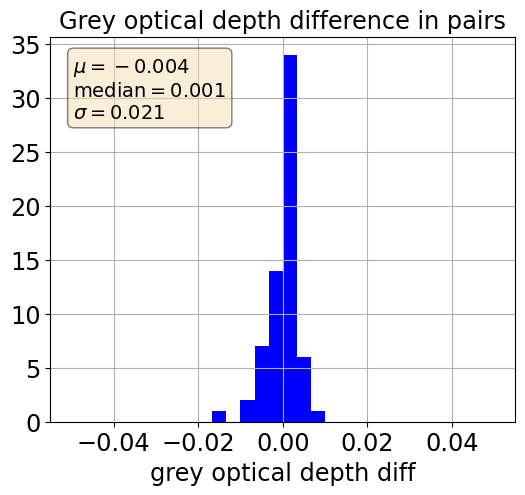

In [42]:
fig = plt.figure(figsize=(6,5))
ax=fig.add_subplot(1,1,1)
h = ax.hist(all_diffgrey,bins=30,range=(-0.05,0.05),facecolor="b");

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax.set_xlabel("grey optical depth diff")
ax.grid()
ax.set_title("Grey optical depth difference in pairs")

In [43]:
df= all_df[0]

In [44]:
df.columns

Index(['index', 'exposure', 'spec_date_obs', 'spec_target_label',
       'spec_filter_label', 'spec_airmass', 'spec_pressure',
       'spec_temperature', 'spec_humidity', 'spec_hour_angle',
       'spec_parallactic_angle', 'spec_camera_angle', 'spec_order',
       'spec_header_target', 'spec_header_redshift', 'spec_header_grating',
       'spec_header_rotangle', 'spec_header_d2ccd', 'spec_header_lshift',
       'spec_header_parangle', 'spec_header_targetx', 'spec_header_targety',
       'spec_header_lbda_ref', 'spec_header_pixshift', 'spec_header_psf_reg',
       'spec_header_trace_r', 'spec_header_chi2_fit', 'spec_header_a2_fit',
       'spec_header_am_fit', 'spec_header_meanfwhm', 'spec_header_version',
       'spec_header_rebin', 'spec_header_date-obs', 'spec_header_exptime',
       'spec_header_airmass', 'spec_header_dec', 'spec_header_ha',
       'spec_header_outtemp', 'spec_header_outpress', 'spec_header_outhum',
       'spec_header_filter', 'spec_header_cam_rot', 'spec_header_s_